In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import userinput
from datetime import datetime

width = (6.3, 4)
plotsize = 25
plotsize_min = 20
bbox_right = 1.08
bbox_right_months = 1.3
folder = "optimization_1_basecase"
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

df_price = pd.read_csv(os.path.join("csv_and_xlsx", "Analysis_I_temp_time.csv"), usecols=['time', 'electricity_price', 'electricity_price_raw'])
df_price['time'] = pd.to_datetime(df_price['time'])
df_price.set_index('time', inplace=True)
daily_el_price = df_price['electricity_price'].resample('D').mean()
daily_el_price_raw = df_price['electricity_price_raw']#.resample('D').mean()
threeH_electricity_price = df_price['electricity_price'].resample('3H').mean()

<Axes: xlabel='time'>

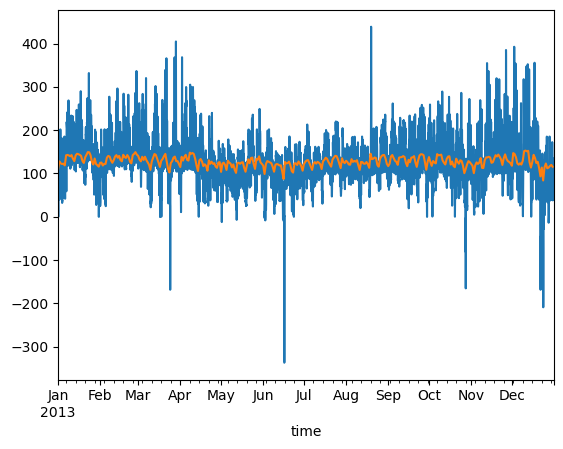

In [2]:
daily_el_price_raw.plot()
daily_el_price.plot()


In [3]:
all_dfs = pd.DataFrame()


for f in csv_files:
    name = f
    f = pd.read_csv(os.path.join(folder, f))

    df_aux = pd.DataFrame({
        'name': [name],
        'phi_standing': [f['phi_standing'].iloc[0]],
        'electricity_price': [f['electricity_price'].iloc[0]],
        'drilling_costs': [f['drilling_costs'].iloc[0]],
        'Capex_TTES': [f['Capex_TTES'].iloc[0]],
        'objective_value': [f['objective_value'].iloc[0]],
        'total_heat_supplied': [f['total_heat_supplied'].iloc[0]],
        'ATES_power': [f['ATES_power'].iloc[0]],
        'costs_per_MWh_produced': [f['costs_per_MWh_produced'].iloc[0]],
        'costs_per_MWh_demand': [f['costs_per_MWh_demand'].iloc[0]],
        'Capex_TTES_total': [f['capex_TTES'].iloc[0]],
        'Capex_ATES_total': [f['capex_ATES'].iloc[0]],
        'Opex_ATES_total': [f['opex_ATES'].iloc[0]],
        'ATES_capacity': [f['ATES_capacity'].iloc[0] if 'ATES_capacity' in f.columns else 0],
        'TTES_capacity': [f['TTES_capacity'].iloc[0]],
        'ATES_discharge': [f['ATES_discharge'].sum() if 'ATES_discharge' in f.columns else 0],
        'ATES_charge': [f['ATES_charge'].sum() if 'ATES_charge' in f.columns else 0],
        'TTES_charge': [f['TTES_charge'][f['TTES_charge'] > 0].sum()],
        'TTES_discharge': [-f['TTES_charge'][f['TTES_charge'] < 0].sum()]
    })
    all_dfs = pd.concat([all_dfs, df_aux], ignore_index=True)

df_01 = pd.read_csv(os.path.join(folder, all_dfs.iloc[0]['name']), parse_dates=['datetime'], index_col='datetime')
df_02 = pd.read_csv(os.path.join(folder, all_dfs.iloc[1]['name']), parse_dates=['datetime'], index_col='datetime')
df_03 = pd.read_csv(os.path.join(folder, all_dfs.iloc[2]['name']), parse_dates=['datetime'], index_col='datetime')
df_04 = pd.read_csv(os.path.join(folder, all_dfs.iloc[3]['name']), parse_dates=['datetime'], index_col='datetime')
df_05 = pd.read_csv(os.path.join(folder, all_dfs.iloc[4]['name']), parse_dates=['datetime'], index_col='datetime')
df_06 = pd.read_csv(os.path.join(folder, all_dfs.iloc[5]['name']), parse_dates=['datetime'], index_col='datetime')
df_07 = pd.read_csv(os.path.join(folder, all_dfs.iloc[6]['name']), parse_dates=['datetime'], index_col='datetime')

In [4]:
all_dfs

name  phi_standing   
0  01_ATES_default_phi_c_0.925253_elp_1.0_drc_100...      0.999984  \
1  02_ATES_NoCap_phi_c_0.925253_elp_1.0_drc_1000....      0.999984   
2  03_ATES_SetCap_phi_c_0.925253_elp_1.0_drc_1000...      0.999984   
3  04_ATES_noTTES_phi_c_0.925253_elp_1.0_drc_1000...      0.999984   
4  05_electricity_price_var_phi_c_0.925253_elp_1....      0.999984   
5  06_electricity_price_var_clipped_phi_c_0.92518...      0.999984   
6  06_electricity_price_var_clipped_phi_c_0.92525...      0.999984   
7  06_electricity_price_var_clipped_phi_c_1.00355...      1.000001   

   electricity_price  drilling_costs  Capex_TTES  objective_value   
0                  1            1000      3036.1     1.045138e+06  \
1                  1            1000      3036.1     1.066786e+06   
2                  1            1000      3036.1     1.064583e+06   
3                  1            1000      3036.1     1.089019e+06   
4                  1            1000      3036.1     9.723814e+05   
5                  1            1000      3036.1     1.059000e+06   
6                  1            1000      3036.1     9.943253e+05   
7                  1            1000      3036.1     9.445879e+05   

   total_heat_supplied  ATES_power  costs_per_MWh_produced   
0         19315.536211    0.808151               54.108677  \
1         19166.674986    0.000000               55.658377   
2         19347.218111    6.005931               55.025133   
3         19459.517499    1.349203               55.963301   
4         19789.524515    2.540850               49.136168   
5         19399.489070    0.484882               54.589061   
6         19663.195373    1.888605               50.567840   
7          6931.539641    3.626573              136.273894   

   costs_per_MWh_demand  Capex_TTES_total  Capex_ATES_total  Opex_ATES_total   
0             54.615883      14972.401871       3172.120385      1507.420988  \
1             55.747140      27199.106245          0.000000         0.000000   
2             55.632029      13098.451815      23574.217790      1819.026047   
3             56.908962          0.000000       5295.834455      2071.484979   
4             50.813828      62796.655266       9973.233028      3828.378522   
5             55.340259      20556.263878       7612.954851       805.292005   
6             51.960554      22590.748964       7413.071198      3225.475059   
7             49.361421      19519.421788      48853.496457      8160.980261   

   ATES_capacity  TTES_capacity  ATES_discharge  ATES_charge  TTES_charge   
0   7.695799e+02      60.848392      610.853020   774.732294  5349.006985  \
1   0.000000e+00     110.538169        0.000000     0.000000  6547.317888   
2   9.341878e+02      53.232590      736.680721   935.324509  4877.765416   
3   9.804458e+02       0.000000      790.349402  1113.710040     0.000000   
4   1.670876e+03     255.207918     1467.719411  2051.234550  8787.640429   
5   4.133640e+02      83.541413      273.301751   514.179334  5887.350422   
6   1.499755e+03      91.809635     1225.960770  1730.722347  7076.997683   
7   1.546744e+06      79.327648    12225.563823     0.000000  8255.253604   

   TTES_discharge  
0     5333.506909  
1     6516.799763  
2     4865.347953  
3       -0.000000  
4     8717.787915  
5     5864.895796  
6     7054.720748  
7     8234.307001

In [5]:
def get_energy_distribution_data(df, time_index_H, heat_demand):
    positive_df = pd.DataFrame(index=time_index_H)
    negative_df = pd.DataFrame(index=time_index_H)
    if df.ATES_discharge.any():
        positive_df["ATES Discharge"] = df.ATES_discharge
    if df.heatpump_ATES.any():
        positive_df["ATES HP"] = df.heatpump_ATES
    if df.eboiler_ATES.any():
        positive_df["ATES E-Boiler"] = df.eboiler_ATES
    if df.eboiler.any():
        positive_df["E-Boiler"] = df.eboiler
    if df.TTES_charge.where(df.TTES_charge < 0, 0).any():
        positive_df["TTES Discharge"] = -df.TTES_charge.where(df.TTES_charge < 0, 0)
    if df.heatpump.where(df.heatpump > 0, 0).any():
        positive_df["Heat Pump"] = df.heatpump.where(df.heatpump > 0, 0)
 
    if heat_demand.any():
        negative_df["Heat Demand"] = -heat_demand
    if df.ATES_charge.any():
        negative_df["ATES Charge"] = -df.ATES_charge
    if df.TTES_charge.where(df.TTES_charge > 0, 0).any():
        negative_df["TTES Charge"] = -df.TTES_charge.where(df.TTES_charge > 0, 0)

    return positive_df, negative_df

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


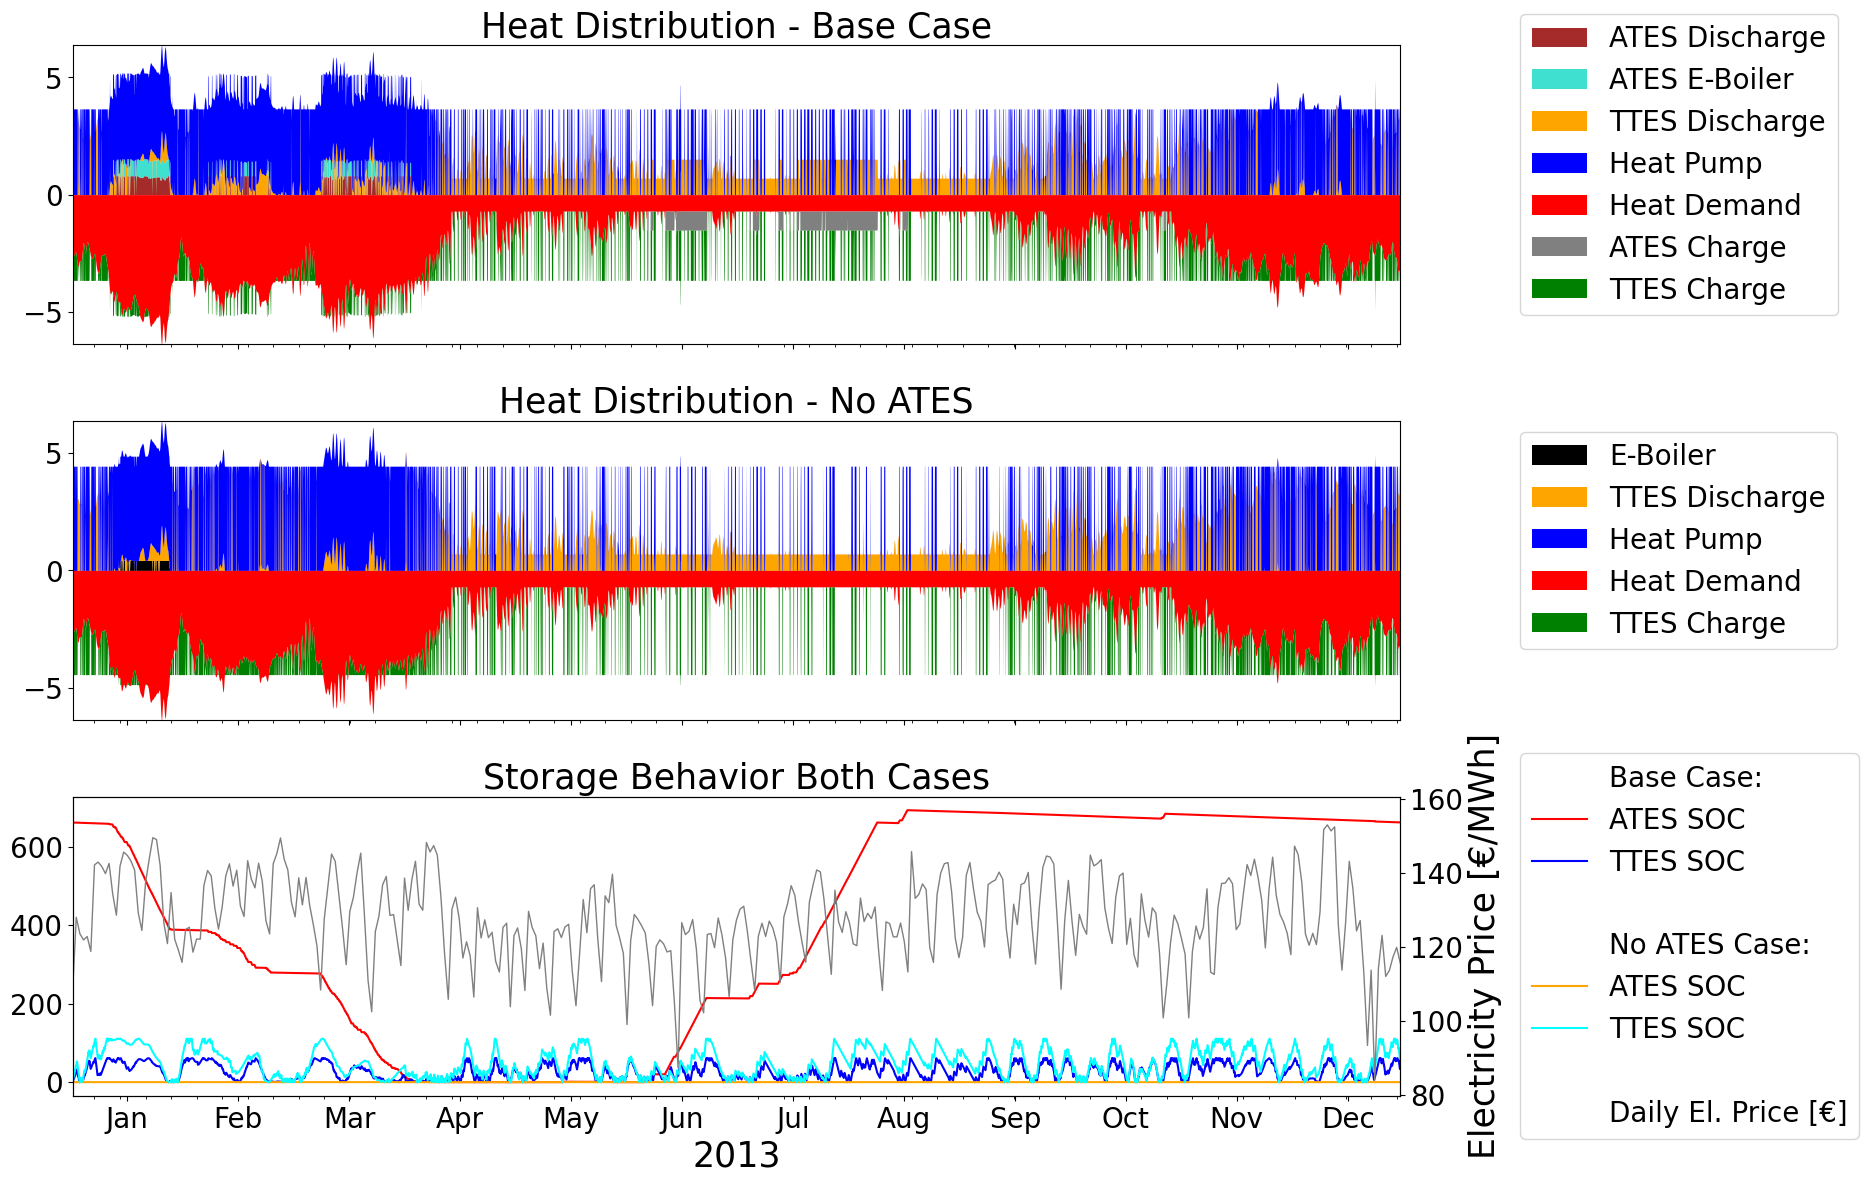

In [6]:
pos_df_01, neg_df_01 = get_energy_distribution_data(df_01, df_01.index, df_01['heat_demand'])
pos_df_02, neg_df_02 = get_energy_distribution_data(df_02, df_02.index, df_02['heat_demand'])
y_min = min(neg_df_01.sum(axis=1).min(),neg_df_02.sum(axis=1).min())
y_max = max(pos_df_01.sum(axis=1).max(),pos_df_02.sum(axis=1).max())

fig, (ax_top, ax_bottom, ax_storage) = plt.subplots(3, 1, figsize=(3*width[0], 3*width[1]), sharex=True)

# Define color mapping for each technology
tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "brown",
    "TTES Charge": "green",
    "TTES Discharge": "orange",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_01 = [tech_colors.get(col, "grey") for col in pos_df_01.columns]
neg_colors_01 = [tech_colors.get(col, "grey") for col in neg_df_01.columns]
pos_colors_02 = [tech_colors.get(col, "grey") for col in pos_df_02.columns]
neg_colors_02 = [tech_colors.get(col, "grey") for col in neg_df_02.columns]

# Plot using the color mapping
pos_df_01.plot.area(ax=ax_top, stacked=True, color=pos_colors_01, linewidth=0.005)
neg_df_01.plot.area(ax=ax_top, stacked=True, color=neg_colors_01, linewidth=0.005)
ax_top.set_ylim(y_min, y_max)
ax_top.tick_params(axis='y', labelsize=plotsize_min)
ax_top.set_title("Heat Distribution - Base Case", fontsize=plotsize)
ax_top.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

pos_df_02.plot.area(ax=ax_bottom, stacked=True, color=pos_colors_02, linewidth=0.005)
neg_df_02.plot.area(ax=ax_bottom, stacked=True, color=neg_colors_02, linewidth=0.005)
ax_bottom.set_ylim(y_min, y_max)
ax_bottom.tick_params(axis='y', labelsize=plotsize_min)

ax_bottom.set_title("Heat Distribution - No ATES", fontsize=plotsize)
ax_bottom.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

# Third plot: Add daily_el_price to storage_behav with its own y-axis
ax_price = ax_storage.twinx()

all_dfs_aux = all_dfs.iloc[[0, 1]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
handles = []
labels = []
case = np.array(['Base Case', 'No ATES Case'])
color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    color = rainbow_cmap[color_idx]
    h1 = df['ATES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h1.lines[color_idx])
    labels.append('ATES SOC')
    color = rainbow_cmap[color_idx+1]
    h2 = df['TTES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h2.lines[color_idx+1])
    labels.append('TTES SOC')
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2

handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('')

h5 = daily_el_price.plot(ax=ax_price, color='grey', label='Daily Electricity Price', linewidth=1.0, linestyle='-')
handles.append(h5.lines[0])
labels.append('Daily El. Price [€]')

ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right, 0.5))
plt.title("Storage Behavior Both Cases", fontsize=plotsize)

ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize)
ax_price.set_ylim(daily_el_price.min() * 0.95, daily_el_price.max() * 1.05)

ax_storage.tick_params(axis='y', labelsize=plotsize_min)
ax_price.tick_params(axis='y', labelsize=plotsize_min)

tick_locs = pos_df_01.index[list(range(15*24, len(pos_df_01.index), 8760 // 12))]
tick_labels = tick_locs.strftime('%b')
#plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=20)
#plt.xlabel(pos_df_01.index.year[0], fontsize=20)
ax_storage.set_xticks(tick_locs)
ax_storage.set_xticklabels(tick_labels, fontsize=plotsize_min)
ax_storage.set_xlabel(pos_df_01.index.year[0], fontsize=plotsize)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand+soc.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()

# Resample all dataframes to 3-hour values (sum or mean as appropriate)
resample = '6H'
pos_df_01_resample = pos_df_01.resample(resample).mean()
neg_df_01_resample = neg_df_01.resample(resample).mean()
pos_df_02_resample = pos_df_02.resample(resample).mean()
neg_df_02_resample = neg_df_02.resample(resample).mean()


tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "orange",
    "TTES Charge": "green",
    "TTES Discharge": "brown",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_01 = [tech_colors.get(col, "grey") for col in pos_df_01_resample.columns]
neg_colors_01 = [tech_colors.get(col, "grey") for col in neg_df_01_resample.columns]
pos_colors_02 = [tech_colors.get(col, "grey") for col in pos_df_02_resample.columns]
neg_colors_02 = [tech_colors.get(col, "grey") for col in neg_df_02_resample.columns]

y_min = min(neg_df_01_resample.sum(axis=1).min(), neg_df_02_resample.sum(axis=1).min())
y_max = max(pos_df_01_resample.sum(axis=1).max(), pos_df_02_resample.sum(axis=1).max())

fig, (ax_top, ax_bottom, ax_storage) = plt.subplots(3, 1, figsize=(3*width[0], 3*width[1]), sharex=True)

pos_df_01_resample.plot.area(ax=ax_top, stacked=True, color=pos_colors_01, linewidth=0.05)
neg_df_01_resample.plot.area(ax=ax_top, stacked=True, color=neg_colors_01, linewidth=0.05)
ax_top.set_ylim(y_min, y_max)
ax_top.tick_params(axis='y', labelsize=plotsize_min)
ax_top.set_title(f"Heat Distribution - Base Case ({resample})", fontsize=plotsize)
ax_top.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.5), fontsize=plotsize_min)

pos_df_02_resample.plot.area(ax=ax_bottom, stacked=True, color=pos_colors_02, linewidth=0.05)
neg_df_02_resample.plot.area(ax=ax_bottom, stacked=True, color=neg_colors_02, linewidth=0.05)
ax_bottom.set_ylim(y_min, y_max)
ax_bottom.tick_params(axis='y', labelsize=plotsize_min)
ax_bottom.set_title(f"Heat Distribution - No ATES ({resample})", fontsize=plotsize)
ax_bottom.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.5), fontsize=plotsize_min)

# For storage behavior, resample ATES_soc and TTES_soc to daily mean

ax_price = ax_storage.twinx()
all_dfs_aux = all_dfs.iloc[[0, 1]]
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
handles = []
labels = []
case = np.array(['Base Case', 'No ATES Case'])
color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    color = rainbow_cmap[color_idx]
    h1 = df['ATES_soc'].resample('D').mean().plot(ax=ax_storage, color=color, label=f'{case[i]} ATES soc')
    handles.append(h1.lines[color_idx])
    labels.append('ATES SOC')
    color = rainbow_cmap[color_idx+1]
    h2 = df['TTES_soc'].resample('D').mean().plot(ax=ax_storage, color=color, label=f'{case[i]} TTES soc')
    handles.append(h2.lines[color_idx+1])
    labels.append('TTES SOC')
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2


#handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('')

handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('Electricity Price:')

h5 = threeH_electricity_price.plot(ax=ax_price, color='lightgrey', linewidth=0.2, linestyle='-')
handles.append(h5.lines[0])
labels.append(f'{resample}ourly')
h6 = daily_el_price.plot(ax=ax_price, color='grey', linewidth=1.0, linestyle='-')
handles.append(h6.lines[0])
labels.append('Daily Mean')



if resample == '3H':
    res_fac = 3
elif resample == '6H':
    res_fac = 6

tick_locs = pos_df_01_resample.index[list(range(int(15*24/res_fac), len(pos_df_01_resample.index), int(8760/res_fac/12)))]
tick_labels = tick_locs.strftime('%b')
plt.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right, 0.5))
plt.title(f"Storage Behavior Both Cases ({resample})", fontsize=plotsize)

# Set x-ticks and labels for the bottom axis (ax_storage) using the resampled index
ax_storage.set_xticks(tick_locs)
ax_storage.set_xticklabels(tick_labels, fontsize=plotsize_min)
ax_storage.set_xlabel(pos_df_01_resample.index.year[0], fontsize=plotsize)

ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize)
ax_price.set_ylim(daily_el_price.min() * 0.95, daily_el_price.max() * 1.05)
# Set y-tick label size for both storage and price axes
ax_storage.tick_params(axis='y', labelsize=plotsize_min)
ax_price.tick_params(axis='y', labelsize=plotsize_min)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand+soc_{resample}.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


# Resample all dataframes to 3-hour values (sum or mean as appropriate)
resample = 'H'
pos_df_01_resample = pos_df_01.resample(resample).mean()
neg_df_01_resample = neg_df_01.resample(resample).mean()
pos_df_02_resample = pos_df_02.resample(resample).mean()
neg_df_02_resample = neg_df_02.resample(resample).mean()

tick_fontsize = 10

tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "orange",
    "TTES Charge": "green",
    "TTES Discharge": "brown",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}


months = [1, 4, 6]
month_names = {1: "January", 4: "April", 6: "June"}

fig, axes = plt.subplots(3, 3, figsize=(3*width[0], 3*width[1]), sharex=False)

for j, month in enumerate(months):
    # Masks for the month
    mask_01 = pos_df_01.index.month == month
    mask_02 = pos_df_02.index.month == month
    mask_neg_01 = neg_df_01.index.month == month
    mask_neg_02 = neg_df_02.index.month == month

    # Row 0: Base Case
    ax = axes[0, j]
    pos_df_01[mask_01].plot.area(ax=ax, stacked=True, color=pos_colors_01, linewidth=0.05, legend=False)
    neg_df_01[mask_neg_01].plot.area(ax=ax, stacked=True, color=neg_colors_01, linewidth=0.05, legend=False)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Base Case - {month_names[month]}", fontsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 0 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only rightmost plot gets legend
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 1: No ATES
    ax = axes[1, j]
    pos_df_02[mask_02].plot.area(ax=ax, stacked=True, color=pos_colors_02, linewidth=0.05, legend=False)
    neg_df_02[mask_neg_02].plot.area(ax=ax, stacked=True, color=neg_colors_02, linewidth=0.05, legend=False)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"No ATES - {month_names[month]}", fontsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if j != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 2: Storage behavior
    ax_storage = axes[2, j]
    for i, fname in enumerate(all_dfs.iloc[[0, 1]]['name']):
        df_path = os.path.join(folder, fname)
        df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
        df_month = df[df.index.month == month]
        ax_storage.plot([], [], ' ', label=f'{case[i]}:')
        df_month['ATES_soc'].resample('D').mean().plot(ax=ax_storage, color=rainbow_cmap[i*2], label=f'ATES soc')
        df_month['TTES_soc'].resample('D').mean().plot(ax=ax_storage, color=rainbow_cmap[i*2+1], label=f'TTES soc')
    ax_storage.set_title(f"Storage - {month_names[month]}", fontsize=plotsize_min)
    if j == 0:
        ax_storage.set_ylabel("SOC [MWh]", fontsize=plotsize_min)
        ax_storage.tick_params(axis='y', labelsize=plotsize_min)

    else:
        ax_storage.set_ylabel("")
        ax_storage.set_yticklabels([])
    if j == 2:
        handles, labels = ax_storage.get_legend_handles_labels()
        ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))
    # Only bottom row gets x labels
    if j != 0:
        ax_storage.set_xlabel("")
    if j != 0:
        ax_storage.set_xticklabels([])

# Only bottom row gets x-axis labels/ticks
for j in range(3):
    for i in range(2):
        axes[i, j].set_xticklabels([])
        axes[i, j].tick_params(axis='y', labelsize=plotsize_min)

# Set common y-limits for all storage (SOC) plots
    soc_min, soc_max = None, None
    for j, month in enumerate(months):
        for i, fname in enumerate(all_dfs.iloc[[0, 1]]['name']):
            df_path = os.path.join(folder, fname)
            df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
            df_month = df[df.index.month == month]
            soc_vals = pd.concat([
                df_month['ATES_soc'].resample('D').mean(),
                df_month['TTES_soc'].resample('D').mean()
            ])
            if soc_min is None or soc_vals.min() < soc_min:
                soc_min = soc_vals.min()
            if soc_max is None or soc_vals.max() > soc_max:
                soc_max = soc_vals.max()

for j, month in enumerate(months):
    ax_storage = axes[2, j]
    ax_storage.set_ylim(soc_min, soc_max)

    # Add electricity price to all bottom plots
    ax_price = ax_storage.twinx()
    price_month = df_price[df_price.index.month == month]['electricity_price'].resample(resample).mean()
    price_month.plot(ax=ax_price, color='grey', linewidth=1.0, linestyle='-', label='Electricity Price')
    if j == 2:
        ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize_min)
        ax_price.tick_params(axis='y', labelsize=plotsize_min)
    else:
        ax_price.set_yticklabels([])
        ax_price.set_ylabel("")
    ax_price.set_ylim(df_price['electricity_price'].min() * 0.95, df_price['electricity_price'].max() * 1.05)
    axes[2, j].set_xlabel("")

plt.tight_layout()
plt.show()


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-

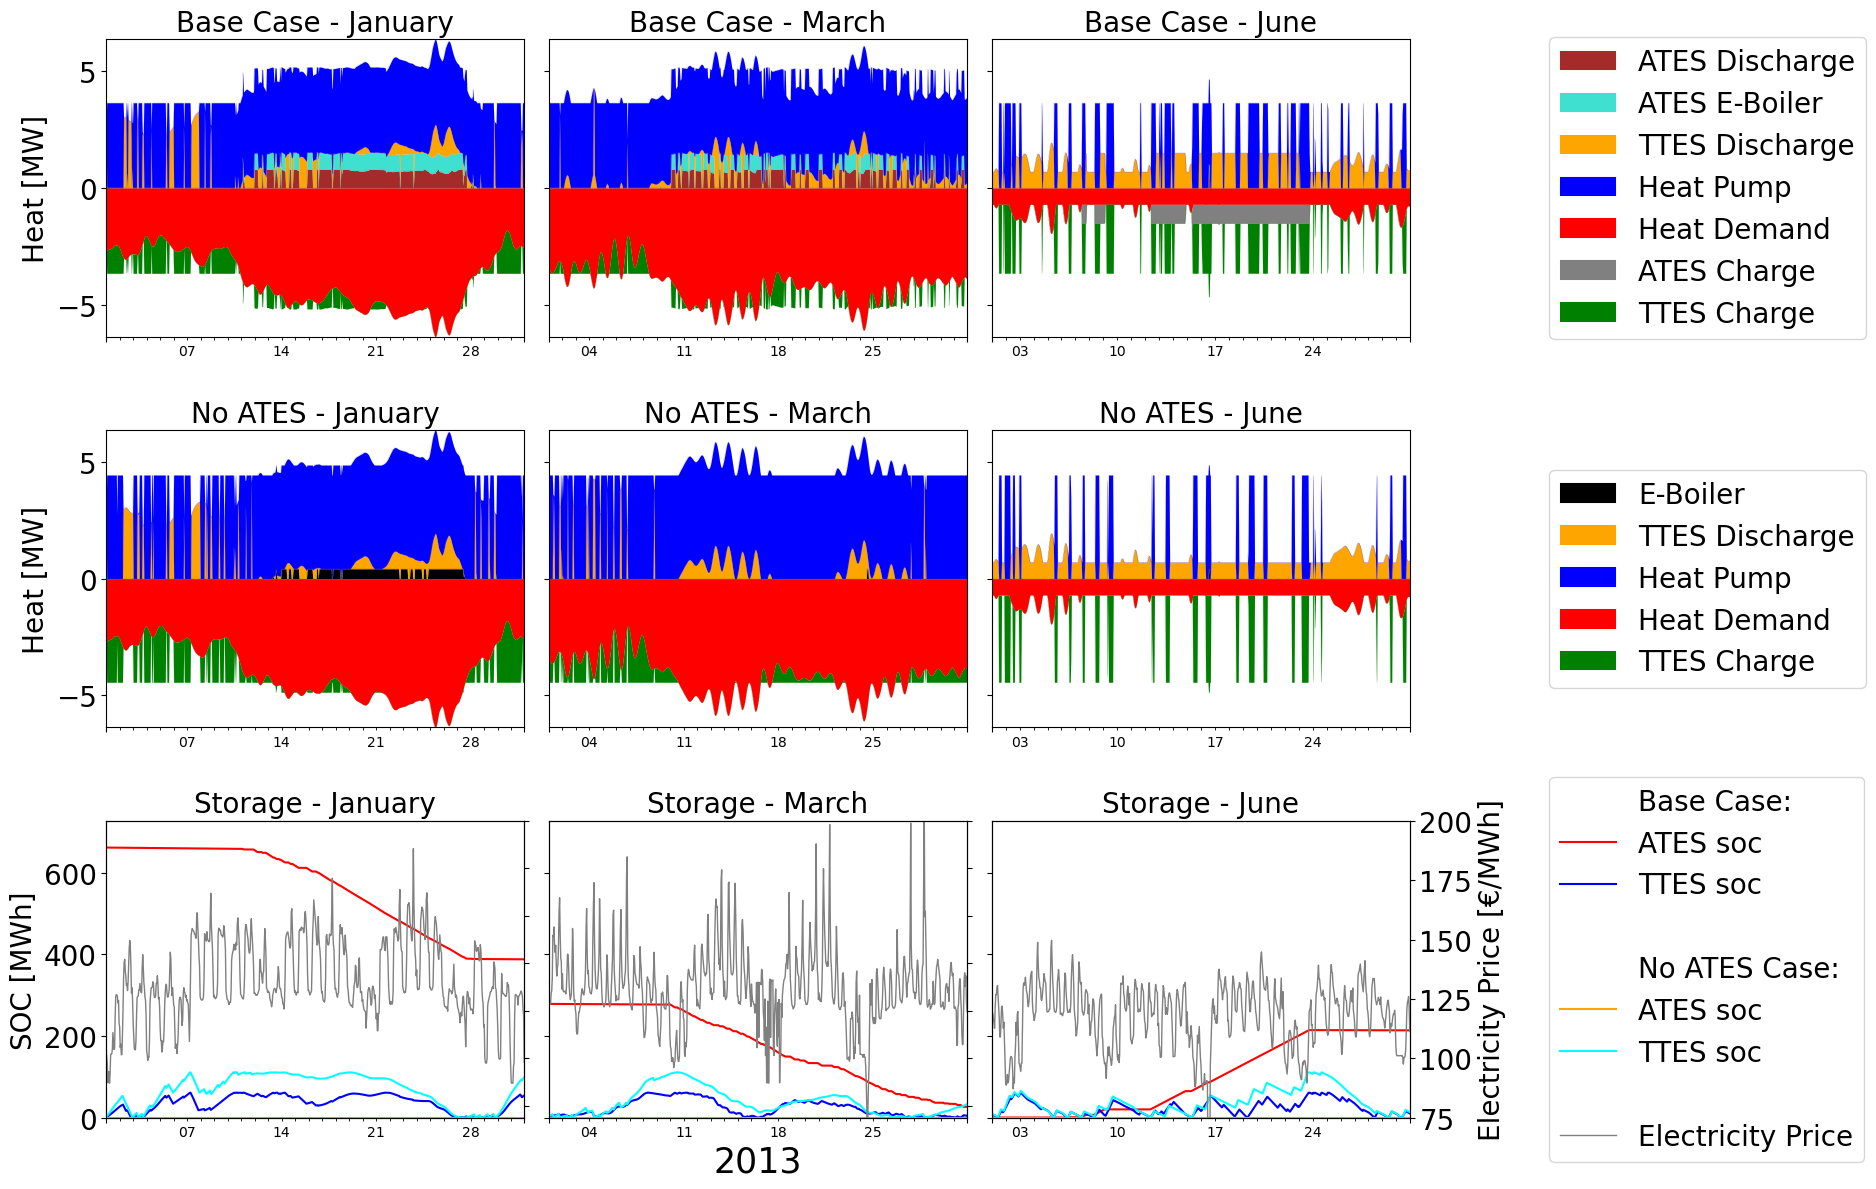

In [7]:
# Resample all dataframes to 3-hour values (sum or mean as appropriate)
resample = 'H'
pos_df_01_resample = pos_df_01.resample(resample).mean()
neg_df_01_resample = neg_df_01.resample(resample).mean()
pos_df_02_resample = pos_df_02.resample(resample).mean()
neg_df_02_resample = neg_df_02.resample(resample).mean()

num_dfs = 0
for i, fname in enumerate(all_dfs['name'].iloc[[0, 1]]):
    df_path = os.path.join(folder, fname)
    globals()[f'df_{i}'] = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    num_dfs+=1

soc_min, soc_max = -1, 0
for i in range(num_dfs):
    if max(globals()[f'df_{i}']['TTES_soc'].max(), globals()[f'df_{i}']['ATES_soc'].max()) * 1.05 > soc_max:
        soc_max = max(globals()[f'df_{i}']['TTES_soc'].max(), globals()[f'df_{i}']['ATES_soc'].max()) * 1.05

tick_fontsize = 10

tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "orange",
    "TTES Charge": "green",
    "TTES Discharge": "brown",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}


months = [1, 3, 6]
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

fig, axes = plt.subplots(3, 3, figsize=(3*width[0], 3*width[1]), sharex=False)

for j, month in enumerate(months):
    # Masks for the month
    mask_01 = pos_df_01.index.month == month
    mask_02 = pos_df_02.index.month == month
    mask_neg_01 = neg_df_01.index.month == month
    mask_neg_02 = neg_df_02.index.month == month

    # Row 0: Base Case
    ax = axes[0, j]
    pos_df_01[mask_01].plot.area(ax=ax, stacked=True, color=pos_colors_01, linewidth=0.05, legend=False)
    neg_df_01[mask_neg_01].plot.area(ax=ax, stacked=True, color=neg_colors_01, linewidth=0.05, legend=False)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Base Case - {month_names[month]}", fontsize=plotsize_min)
    ax.tick_params(axis='y', labelsize=plotsize_min)
    ax.tick_params(axis='x', labelsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 0 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only rightmost plot gets legend
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 1: No ATES
    ax = axes[1, j]
    pos_df_02[mask_02].plot.area(ax=ax, stacked=True, color=pos_colors_02, linewidth=0.05, legend=False)
    neg_df_02[mask_neg_02].plot.area(ax=ax, stacked=True, color=neg_colors_02, linewidth=0.05, legend=False)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"No ATES - {month_names[month]}", fontsize=plotsize_min)
    ax.tick_params(axis='y', labelsize=plotsize_min)
    ax.tick_params(axis='x', labelsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 1 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 2: Storage behavior and electricity price
    ax_storage = axes[2, j]
    ax_price = ax_storage.twinx()
    handles, labels = ax_storage.get_legend_handles_labels()
    Cases = ['Base Case', 'No ATES Case']
    color_idx = 0
    rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
    for i in range(num_dfs):
        df = globals()[f'df_{i}']
        df_month = df[df.index.month == month]

        handles.append(matplotlib.lines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0))
        labels.append(f'{Cases[i]}:')
        color = rainbow_cmap[color_idx]
        x = df_month['ATES_soc'].plot(ax=ax_storage, color=color)
        handles.append(x.lines[color_idx])
        labels.append(f'ATES soc')
        color = rainbow_cmap[color_idx+1]
        x = df_month['TTES_soc'].plot(ax=ax_storage, color=color, label=f'TTES soc')
        handles.append(x.lines[color_idx+1])
        labels.append(f'TTES soc')
        color_idx += 2
        handles.append(matplotlib.lines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0))
        labels.append('')

    # Add electricity price to all bottom plots
    price_month = df_price[df_price.index.month == month]['electricity_price'].resample(resample).mean()
    price_month.plot(ax=ax_price, color='grey', linewidth=1.0, linestyle='-', label='Electricity Price')
    
    price_lines, price_labels = ax_price.get_legend_handles_labels()
    handles.append(price_lines[0])
    labels.append('Electricity Price')

    ax_price.set_ylim(75, 200)

    ax_storage.set_title(f"Storage - {month_names[month]}", fontsize=plotsize_min)
    ax_storage.set_ylim(soc_min, soc_max)
    ax_storage.tick_params(axis='y', labelsize=plotsize_min)

    if j == 0:
        ax_storage.set_ylabel("SOC [MWh]", fontsize=plotsize_min)
        #ax_storage.set_yticklabels([])
        ax_price.set_ylabel('')
        ax_price.set_yticklabels([])
    elif j == 2:
        ax_storage.set_ylabel("")
        ax_storage.set_yticklabels([])
        ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize_min)
        ax_price.tick_params(axis='y', labelsize=plotsize_min)

        ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))
    else:
        ax_storage.set_ylabel("")
        ax_storage.set_yticklabels([])
        ax_price.set_ylabel('')
        ax_price.set_yticklabels([])
    
    axes[2, j].set_xlabel("")
    ax_storage.set_xticklabels([])# Only bottom row gets x labels
    if j == 1:
        ax_storage.set_xlabel(df_01.index.year[0], fontsize=plotsize)
    ax_price.tick_params(axis='x', labelsize=plotsize_min)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand+soc_Months.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


In [8]:
Cases[1]

'No ATES Case'

In [9]:
df.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2013-12-31 14:00:00', '2013-12-31 15:00:00',
               '2013-12-31 16:00:00', '2013-12-31 17:00:00',
               '2013-12-31 18:00:00', '2013-12-31 19:00:00',
               '2013-12-31 20:00:00', '2013-12-31 21:00:00',
               '2013-12-31 22:00:00', '2013-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8760, freq=None)

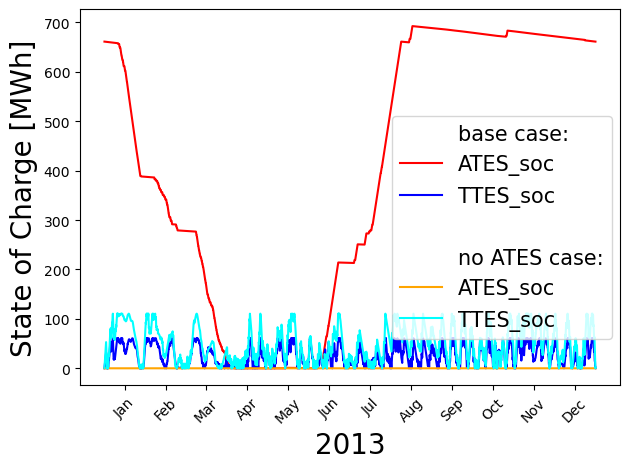

In [10]:
tick_locs = range(15*24, len(df), 8760 // 12)
tick_labels = df.index.strftime('%b')[list(tick_locs)]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)

plt.legend(handles, labels, fontsize=15, loc='center right', bbox_to_anchor=(1.005, 0.42))
plt.tight_layout()

os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
# Plot energy distribution for df_01 and df_02 above the main plot, sharing the same x-axis






all_dfs_aux = all_dfs.iloc[[0, 1]]

num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])

ax1 = plt.gca()
handles = []
labels = []
case = np.array(['base case', 'no ATES case'])
color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    handles.extend([h1, h2])
    labels.extend(['ATES_soc', 'TTES_soc'])
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2

ax1.set_xlabel('2013', fontsize=20)
ax1.set_ylabel('State of Charge [MWh]', fontsize=20)

tick_locs = range(15*24, len(df['datetime']), 8760 // 12)
tick_labels = pd.to_datetime(df['datetime']).dt.strftime('%b')[list(tick_locs)]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)

plt.legend(handles, labels, fontsize=15, loc='center right', bbox_to_anchor=(1.005, 0.42))
plt.tight_layout()

os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


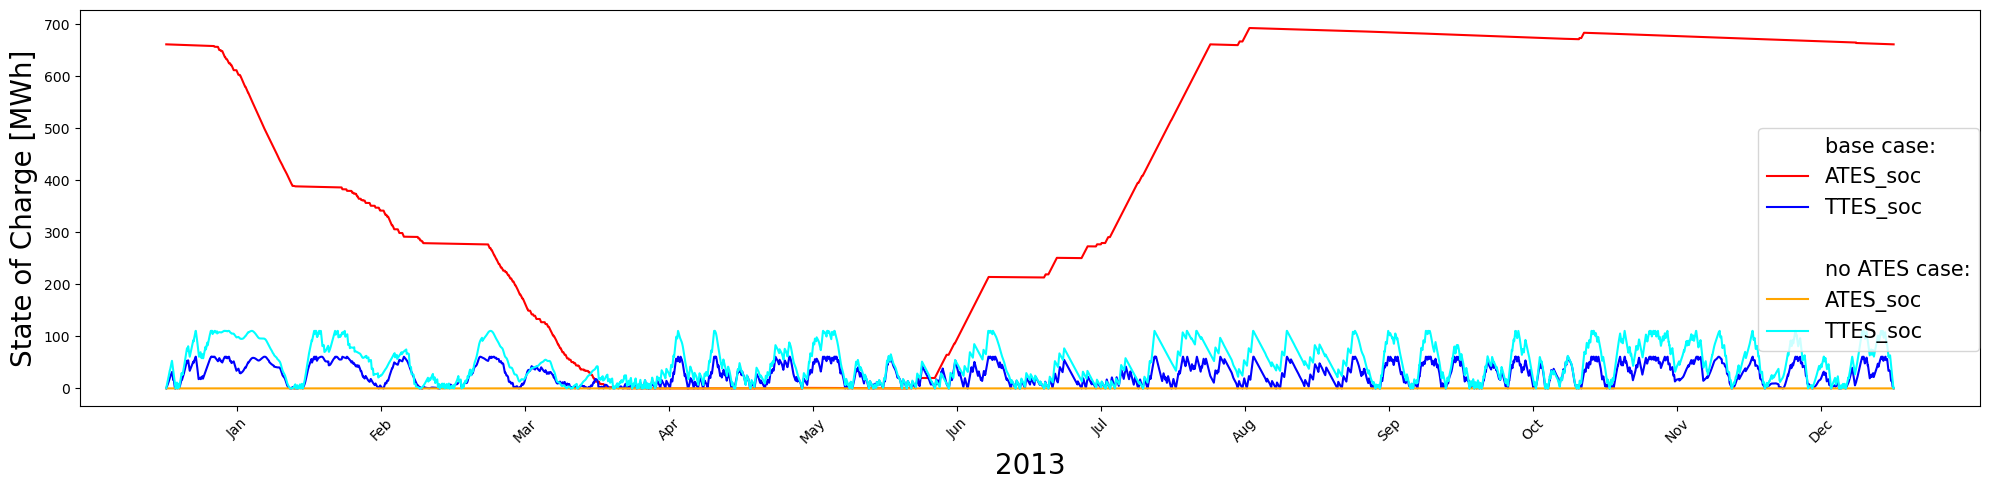

In [11]:
from datetime import datetime
all_dfs_aux = all_dfs.iloc[[0, 1]]

num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'white', 'orange', 'cyan', 'white'])

plt.figure(figsize=(20, 5))

ax1 = plt.gca()
#ax2 = ax1.twinx()

handles = []
labels = []
case = np.array(['base case', 'no ATES case'])
color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    #color = rainbow_cmap[color_idx+2]
    #mean_heatcosts = df['costs_per_MWh_demand'].mean()
    #h3, = ax2.plot(df['costs_per_MWh_demand'], color=color, label=f'{case[i]} energy_balance (mean={mean_heatcosts:.2f})', linestyle='--')
    handles.extend([h1, h2])#, h3
    labels.extend([
        f'ATES_soc',
        f'TTES_soc',
        #f'heat costs demand [€/MWh](mean={mean_heatcosts:.2f}),\ntotal yearly system costs={df["objective_value"].iloc[0]:.2f} [€]'
    ])  

    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 3

ax1.set_xlabel('2013', fontsize=20)
ax1.set_ylabel('State of Charge [MWh]', fontsize=20)

tick_locs = range(15*24, len(df['datetime']), 8760 // 12)
tick_labels = pd.to_datetime(df['datetime']).dt.strftime('%b')[list(tick_locs)]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)

plt.legend(handles, labels, fontsize=15, loc='center right', bbox_to_anchor=(1.005, 0.42))
plt.tight_layout()

os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


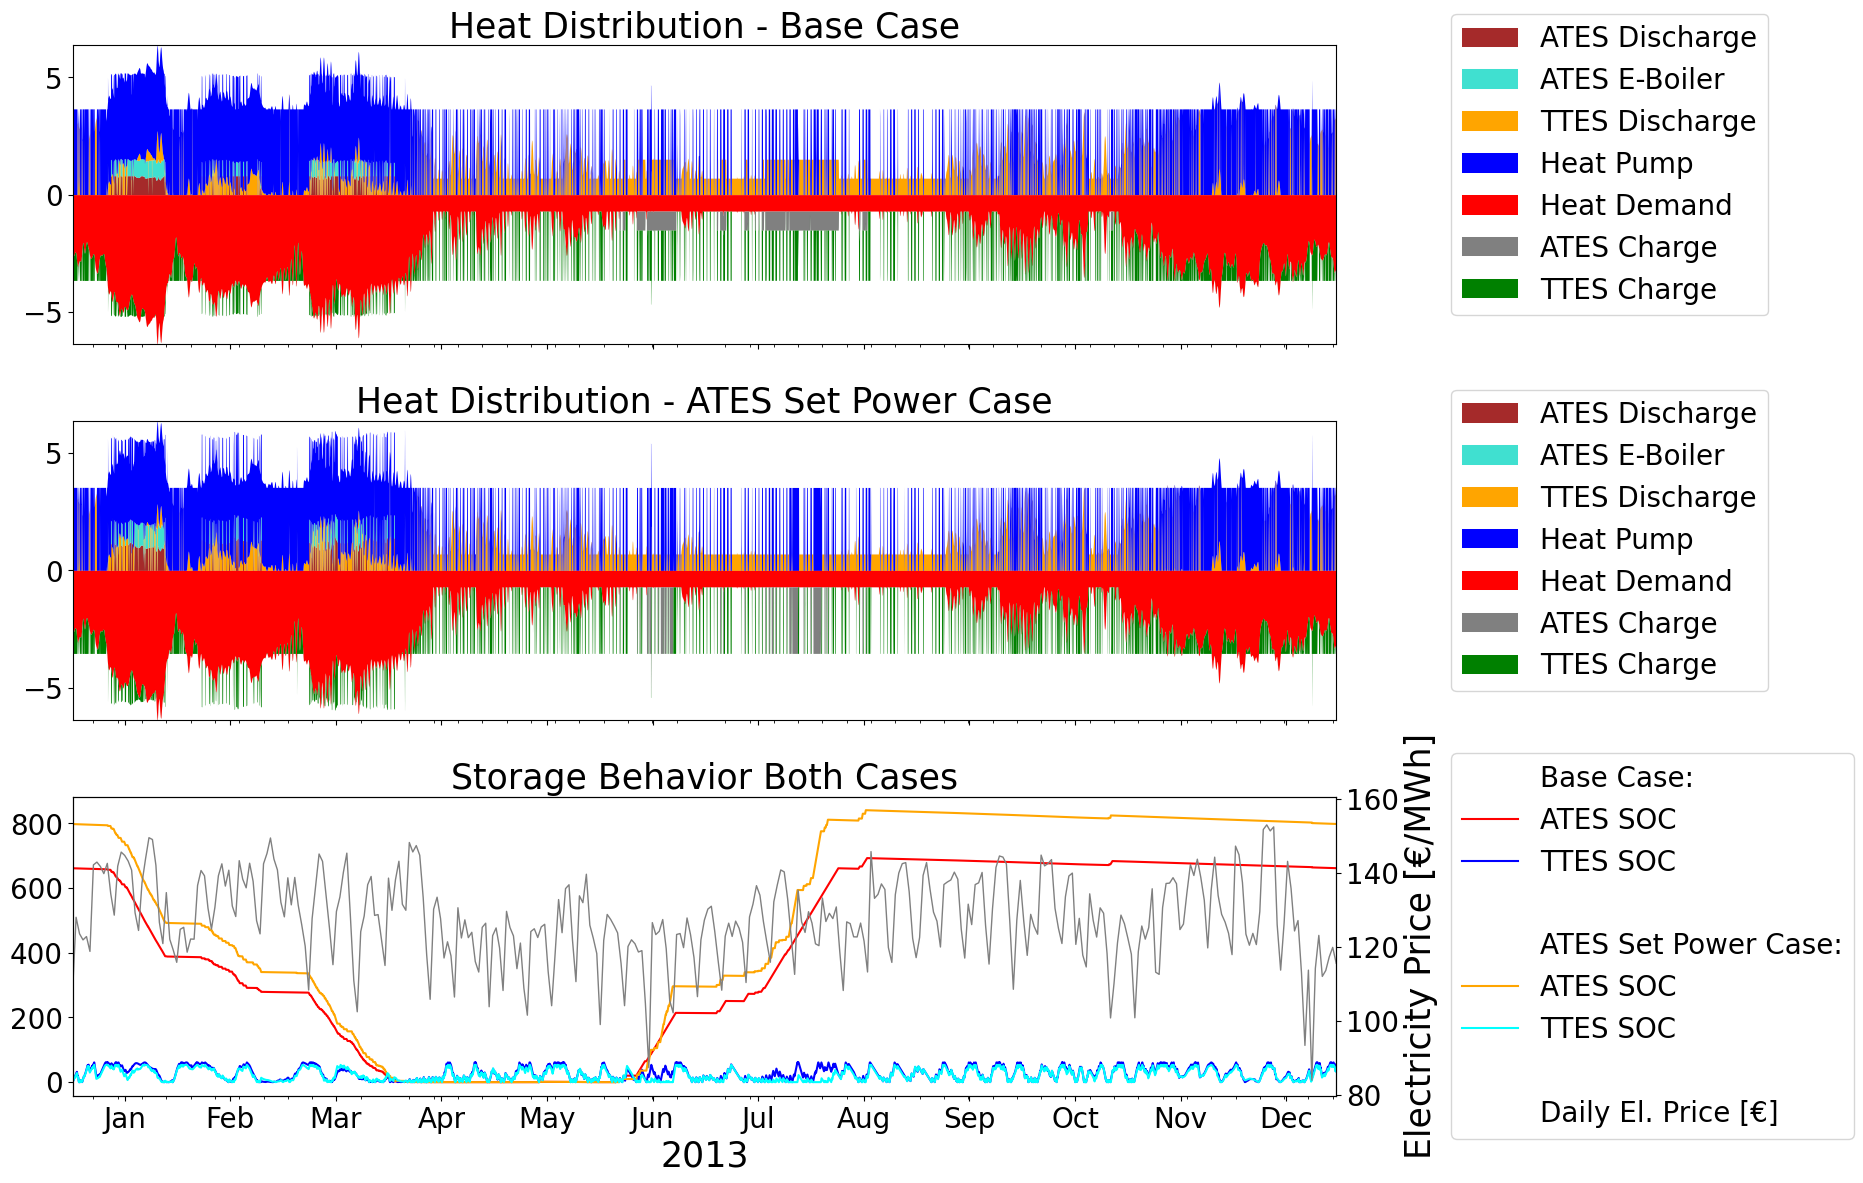

In [12]:
case = np.array(['Base Case', 'ATES Set Power Case'])
pos_df_1, neg_df_1 = get_energy_distribution_data(df_01, df_01.index, df_01['heat_demand'])
pos_df_2, neg_df_2 = get_energy_distribution_data(df_03, df_03.index, df_03['heat_demand'])
y_min = min(neg_df_1.sum(axis=1).min(),neg_df_2.sum(axis=1).min())
y_max = max(pos_df_1.sum(axis=1).max(),pos_df_2.sum(axis=1).max())

fig, (ax_top, ax_bottom, ax_storage) = plt.subplots(3, 1, figsize=(3*width[0], 3*width[1]), sharex=True)

# Define color mapping for each technology
tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "brown",
    "TTES Charge": "green",
    "TTES Discharge": "orange",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_1 = [tech_colors.get(col, "grey") for col in pos_df_1.columns]
neg_colors_1 = [tech_colors.get(col, "grey") for col in neg_df_1.columns]
pos_colors_2 = [tech_colors.get(col, "grey") for col in pos_df_2.columns]
neg_colors_2 = [tech_colors.get(col, "grey") for col in neg_df_2.columns]

# Plot using the color mapping
pos_df_1.plot.area(ax=ax_top, stacked=True, color=pos_colors_1, linewidth=0.005)
neg_df_1.plot.area(ax=ax_top, stacked=True, color=neg_colors_1, linewidth=0.005)
ax_top.set_ylim(y_min, y_max)
ax_top.tick_params(axis='y', labelsize=plotsize_min)
ax_top.set_title(f"Heat Distribution - {case[0]}", fontsize=plotsize)
ax_top.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

pos_df_2.plot.area(ax=ax_bottom, stacked=True, color=pos_colors_2, linewidth=0.005)
neg_df_2.plot.area(ax=ax_bottom, stacked=True, color=neg_colors_2, linewidth=0.005)
ax_bottom.set_ylim(y_min, y_max)
ax_bottom.tick_params(axis='y', labelsize=plotsize_min)

ax_bottom.set_title(f"Heat Distribution - {case[1]}", fontsize=plotsize)
ax_bottom.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

# Third plot: Add daily_el_price to storage_behav with its own y-axis
ax_price = ax_storage.twinx()

all_dfs_aux = all_dfs.iloc[[0, 2]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
handles = []
labels = []

color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    color = rainbow_cmap[color_idx]
    h1 = df['ATES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h1.lines[color_idx])
    labels.append('ATES SOC')
    color = rainbow_cmap[color_idx+1]
    h2 = df['TTES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h2.lines[color_idx+1])
    labels.append('TTES SOC')
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2

handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('')

h5 = daily_el_price.plot(ax=ax_price, color='grey', label='Daily Electricity Price', linewidth=1.0, linestyle='-')
handles.append(h5.lines[0])
labels.append('Daily El. Price [€]')

ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right, 0.5))
plt.title("Storage Behavior Both Cases", fontsize=plotsize)

ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize)
ax_price.set_ylim(daily_el_price.min() * 0.95, daily_el_price.max() * 1.05)

ax_storage.tick_params(axis='y', labelsize=plotsize_min)
ax_price.tick_params(axis='y', labelsize=plotsize_min)

tick_locs = pos_df_01.index[list(range(15*24, len(pos_df_01.index), 8760 // 12))]
tick_labels = tick_locs.strftime('%b')
#plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=20)
#plt.xlabel(pos_df_01.index.year[0], fontsize=20)
ax_storage.set_xticks(tick_locs)
ax_storage.set_xticklabels(tick_labels, fontsize=plotsize_min)
ax_storage.set_xlabel(pos_df_01.index.year[0], fontsize=plotsize)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_ATES_SetCap_comparison_demand+soc.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


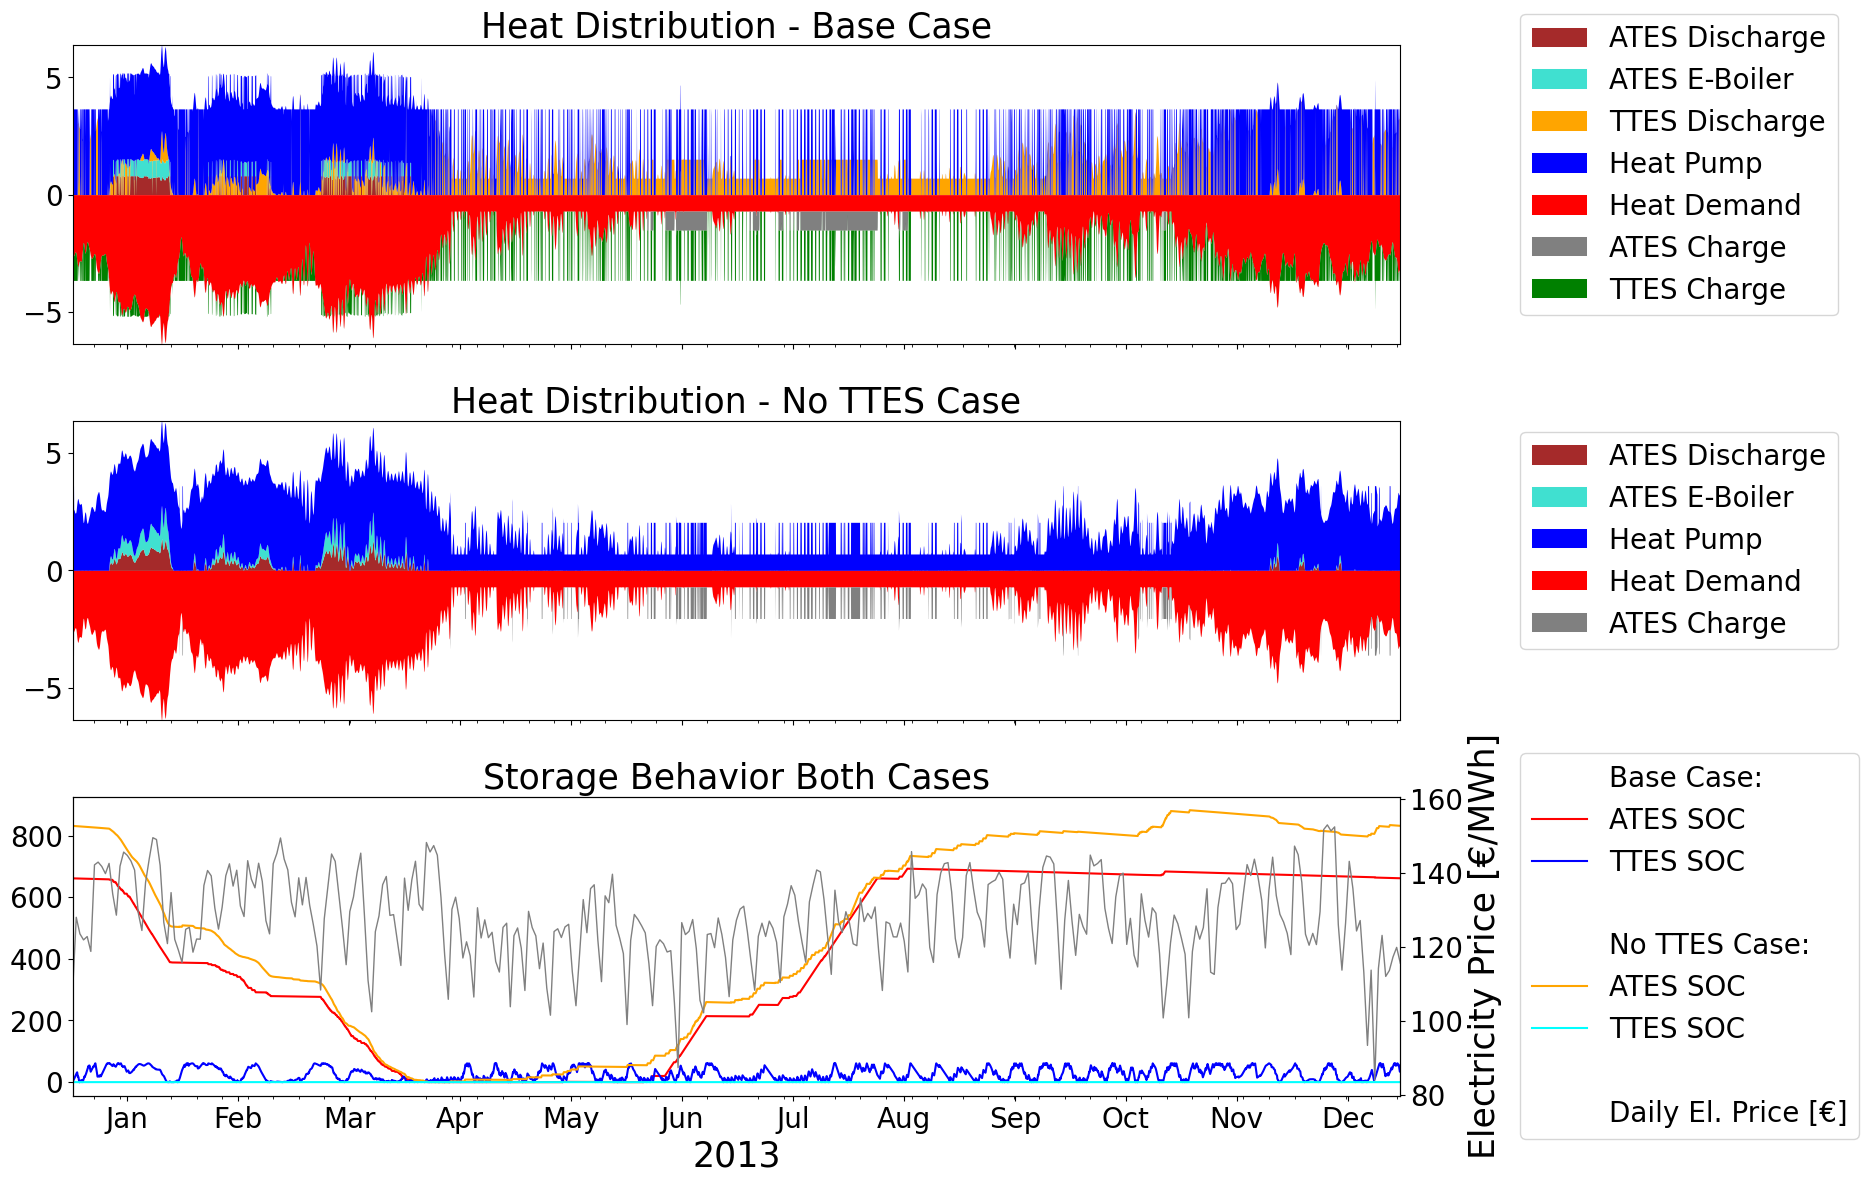

In [13]:
case = np.array(['Base Case', 'No TTES Case'])
pos_df_1, neg_df_1 = get_energy_distribution_data(df_01, df_01.index, df_01['heat_demand'])
pos_df_2, neg_df_2 = get_energy_distribution_data(df_04, df_04.index, df_04['heat_demand'])
y_min = min(neg_df_1.sum(axis=1).min(),neg_df_2.sum(axis=1).min())
y_max = max(pos_df_1.sum(axis=1).max(),pos_df_2.sum(axis=1).max())

fig, (ax_top, ax_bottom, ax_storage) = plt.subplots(3, 1, figsize=(3*width[0], 3*width[1]), sharex=True)

# Define color mapping for each technology
tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "brown",
    "TTES Charge": "green",
    "TTES Discharge": "orange",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_1 = [tech_colors.get(col, "grey") for col in pos_df_1.columns]
neg_colors_1 = [tech_colors.get(col, "grey") for col in neg_df_1.columns]
pos_colors_2 = [tech_colors.get(col, "grey") for col in pos_df_2.columns]
neg_colors_2 = [tech_colors.get(col, "grey") for col in neg_df_2.columns]

# Plot using the color mapping
pos_df_1.plot.area(ax=ax_top, stacked=True, color=pos_colors_1, linewidth=0.005)
neg_df_1.plot.area(ax=ax_top, stacked=True, color=neg_colors_1, linewidth=0.005)
ax_top.set_ylim(y_min, y_max)
ax_top.tick_params(axis='y', labelsize=plotsize_min)
ax_top.set_title(f"Heat Distribution - {case[0]}", fontsize=plotsize)
ax_top.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

pos_df_2.plot.area(ax=ax_bottom, stacked=True, color=pos_colors_2, linewidth=0.005)
neg_df_2.plot.area(ax=ax_bottom, stacked=True, color=neg_colors_2, linewidth=0.005)
ax_bottom.set_ylim(y_min, y_max)
ax_bottom.tick_params(axis='y', labelsize=plotsize_min)

ax_bottom.set_title(f"Heat Distribution - {case[1]}", fontsize=plotsize)
ax_bottom.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

# Third plot: Add daily_el_price to storage_behav with its own y-axis
ax_price = ax_storage.twinx()

all_dfs_aux = all_dfs.iloc[[0, 3]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
handles = []
labels = []

color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    color = rainbow_cmap[color_idx]
    h1 = df['ATES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h1.lines[color_idx])
    labels.append('ATES SOC')
    color = rainbow_cmap[color_idx+1]
    h2 = df['TTES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h2.lines[color_idx+1])
    labels.append('TTES SOC')
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2

handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('')

h5 = daily_el_price.plot(ax=ax_price, color='grey', label='Daily Electricity Price', linewidth=1.0, linestyle='-')
handles.append(h5.lines[0])
labels.append('Daily El. Price [€]')

ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right, 0.5))
plt.title("Storage Behavior Both Cases", fontsize=plotsize)

ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize)
ax_price.set_ylim(daily_el_price.min() * 0.95, daily_el_price.max() * 1.05)

ax_storage.tick_params(axis='y', labelsize=plotsize_min)
ax_price.tick_params(axis='y', labelsize=plotsize_min)

tick_locs = pos_df_01.index[list(range(15*24, len(pos_df_01.index), 8760 // 12))]
tick_labels = tick_locs.strftime('%b')
#plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=20)
#plt.xlabel(pos_df_01.index.year[0], fontsize=20)
ax_storage.set_xticks(tick_locs)
ax_storage.set_xticklabels(tick_labels, fontsize=plotsize_min)
ax_storage.set_xlabel(pos_df_01.index.year[0], fontsize=plotsize)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_NoTTES_comparison_demand+soc.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()

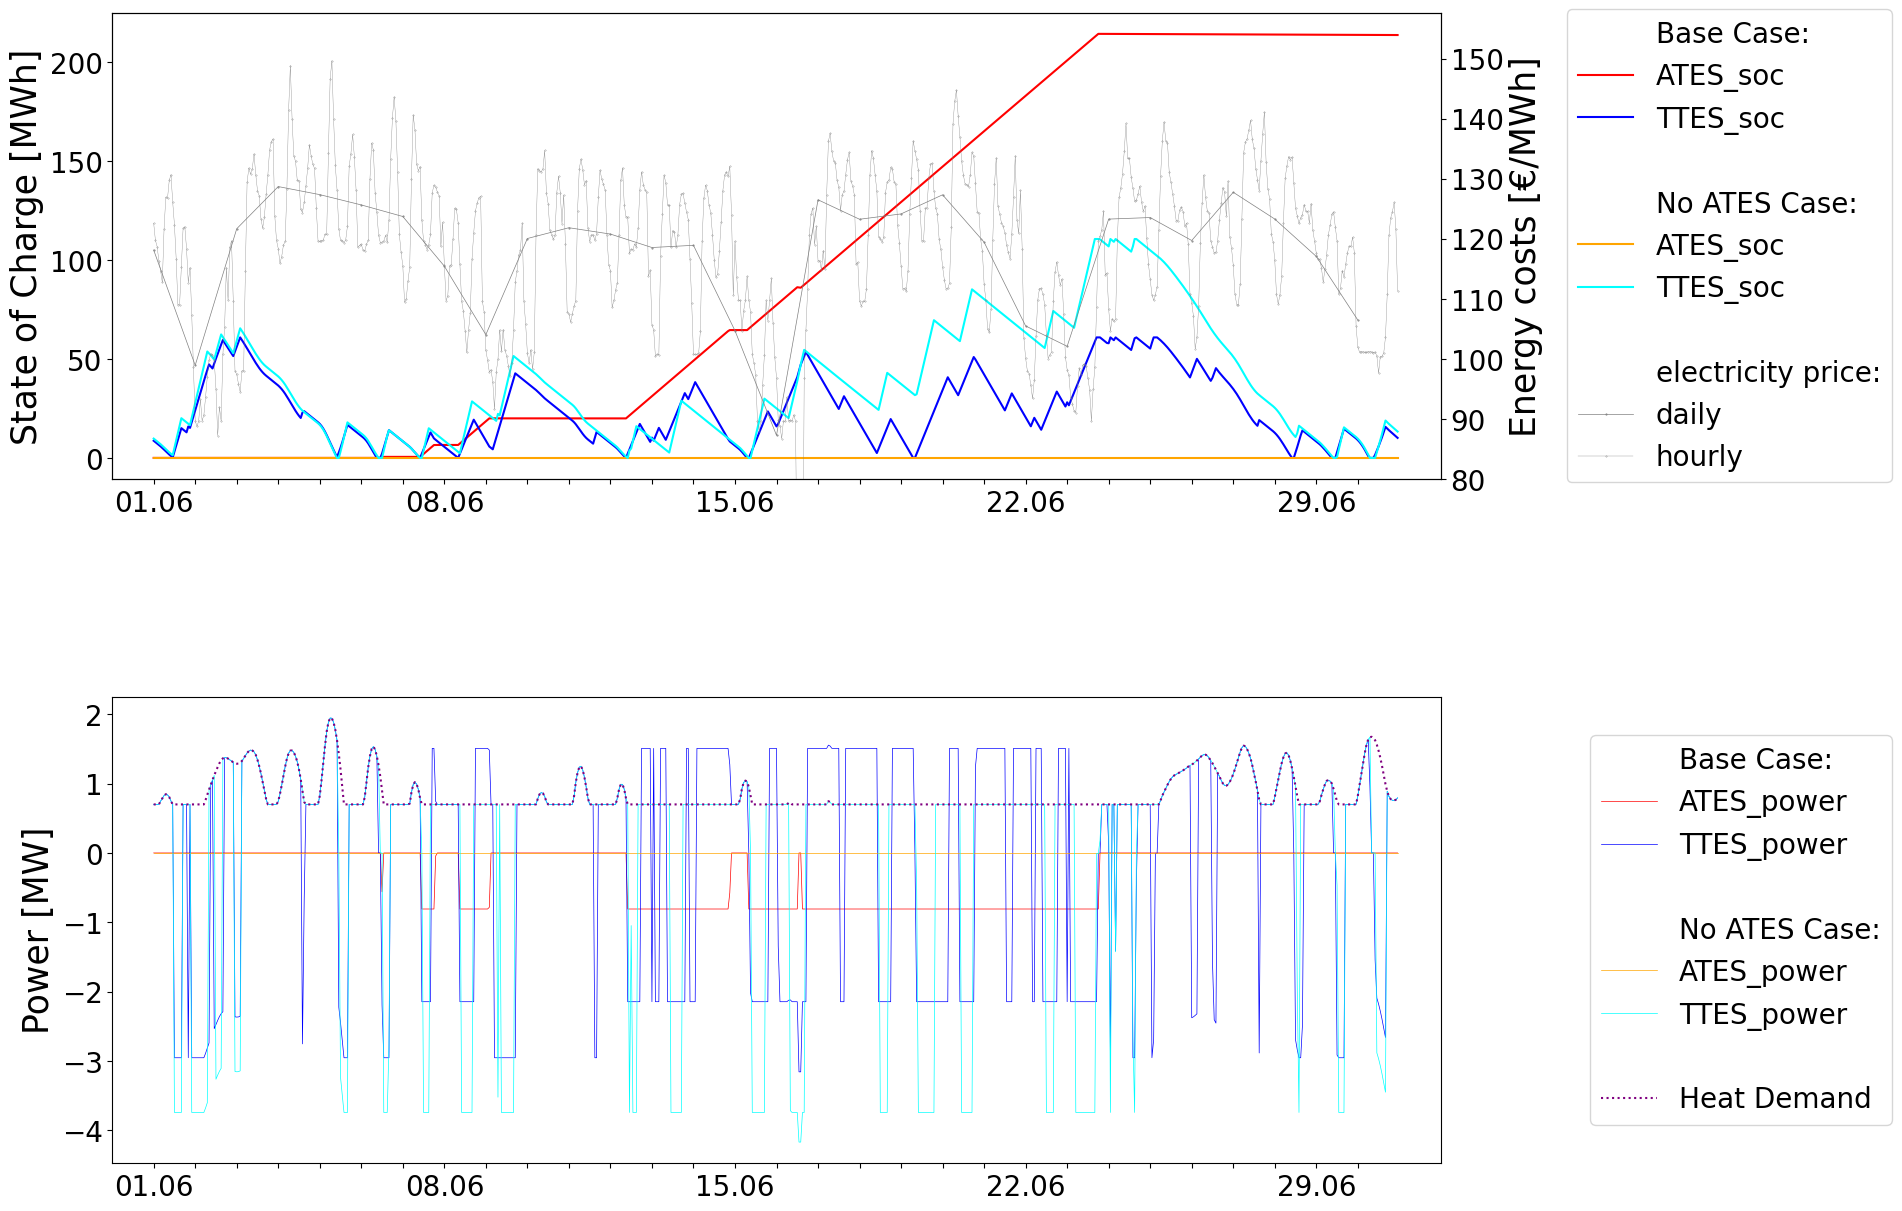

In [14]:
all_dfs_aux = all_dfs.iloc[[0, 1]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'white', 'orange', 'cyan', 'white'])
case = np.array(['Base Case', 'No ATES Case'])

# Prepare figure with 2 rows
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(3*width[0], 3*width[1]), sharex=False, gridspec_kw={'hspace': 0.3}, constrained_layout=True)
ax2 = ax1.twinx()  # electricity price on top plot

handles_p1 = []
labels_p1 = []
handles_p2 = []
labels_p2 = []
color_idx = 0

month = 6

for i, fname in enumerate(all_dfs_aux['name']):
    handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
    labels_p1.append(f'{case[i]}:')
    handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
    labels_p2.append(f'{case[i]}:')    

    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    df.index = pd.to_datetime(df['datetime'])
    df = df.drop(columns=['datetime'], errors='ignore')  

    # Filter for month
    df_month = df[df.index.month == month].copy()
    df_month['ATES_power'] = df_month['ATES_charge'] - df_month['ATES_discharge']

    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df_month['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    g1, = ax3.plot(-df_month['ATES_power'], linewidth=0.5, color=color, label=f'{case[i]} ATES Power [MW]')

    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df_month['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    g2, = ax3.plot(-df_month['TTES_charge'], linewidth=0.5, color=color, label=f'{case[i]} TTES Power [MW]')

    handles_p1.extend([h1, h2])
    handles_p2.extend([g1, g2])
    labels_p1.extend(['ATES_soc', 'TTES_soc'])
    labels_p2.extend(['ATES_power', 'TTES_power'])

    handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
    handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux):
        labels_p1.append('')
        labels_p2.append('')
    color_idx += 3

# --- Electricity price ---
ates_i_temp_df = pd.read_csv(os.path.join("csv_and_xlsx/Analysis_I_temp_time.csv"))
ates_i_temp_df.index = pd.to_datetime(ates_i_temp_df['time'])
ates_i_temp_df = ates_i_temp_df.drop(columns=['Unnamed: 0', 'time', 'datetime'], errors='ignore')
ates_i_temp_df_june = ates_i_temp_df[ates_i_temp_df.index.month == 6]

h5, = ax2.plot(ates_i_temp_df_june['electricity_price'].resample('D').mean(),
               color='grey', label='electricity_price daily', linewidth=0.5, marker='.', markersize=1)
h6, = ax2.plot(ates_i_temp_df_june['electricity_price'].resample('H').mean(),
               color='grey', label='electricity_price hourly', linewidth=0.25, marker='.', markersize=0.5)

handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
labels_p1.append('electricity price:')
handles_p1.extend([h5, h6])
labels_p1.extend(['daily', 'hourly'])

g5, = ax3.plot(ates_i_temp_df_june['heat_demand'],
         color='purple', label='Heat Demand [MW]', linestyle=':')

# handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
# labels_p2.append('')
handles_p2.extend([g5])
labels_p2.extend(['Heat Demand'])

# --- Axis labels ---
ax1.set_xlabel('')
ax1.set_ylabel('State of Charge [MWh]', fontsize=plotsize)
ax2.set_ylabel('Energy costs [€/MWh]', fontsize=plotsize)
ax2.set_ylim(bottom=80)

ax3.set_ylabel('Power [MW]', fontsize=plotsize)

# --- Ticks and x-limits for top plot ---
tick_locs = df_month.resample('D').mean().index
tick_labels_month = df_month.index.strftime('%d.%m').unique()
ax1.set_xticks(tick_locs)
ax3.set_xticks(tick_locs)
# Show only every 3rd tick label (or change to 7 for every 7th)
step = 7  # set to 7 for every 7th
tick_labels_month_mod = [label if i % step == 0 else '' for i, label in enumerate(tick_labels_month)]
ax1.set_xticklabels(tick_labels_month_mod, fontsize=plotsize_min)
ax3.set_xticklabels(tick_labels_month_mod, fontsize=plotsize_min)
ax1.tick_params(axis='y', labelsize=plotsize_min)
ax2.tick_params(axis='y', labelsize=plotsize_min)
ax3.tick_params(axis='y', labelsize=plotsize_min)
ax1.set_xlim(tick_locs[0]-pd.Timedelta(days=1), tick_locs[-1] + pd.Timedelta(days=2))
ax3.set_xlim(tick_locs[0]-pd.Timedelta(days=1), tick_locs[-1] + pd.Timedelta(days=2))


ax1.legend(handles_p1, labels_p1, fontsize=plotsize_min, loc='center right', bbox_to_anchor=(1.35, 0.5))
ax3.legend(handles_p2, labels_p2, fontsize=plotsize_min, loc='center right', bbox_to_anchor=(1.35, 0.5))
#plt.tight_layout()

os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_no_ATES_comparison_demand_{month_names[month]}_with_power_temp.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


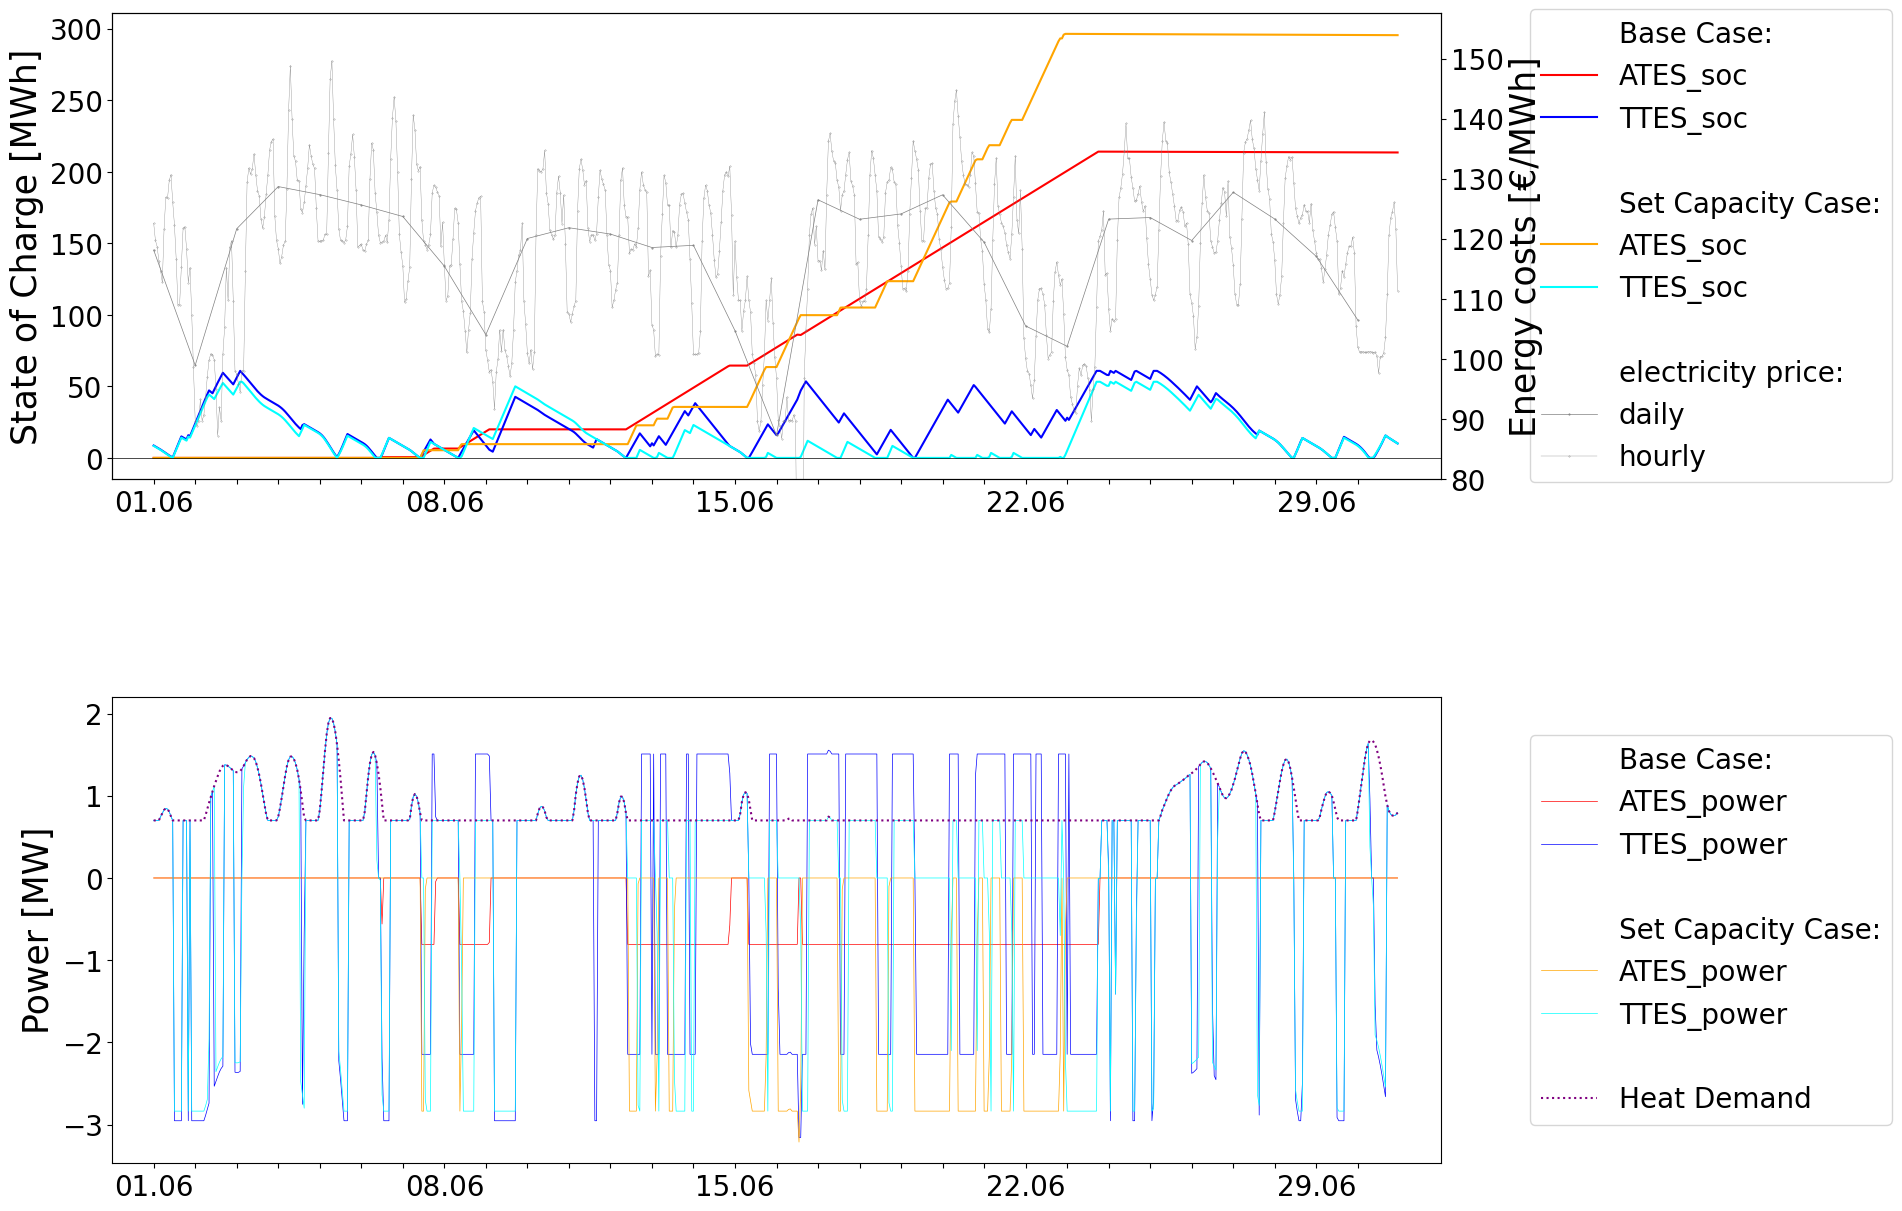

In [15]:
all_dfs_aux = all_dfs.iloc[[0, 2]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'white', 'orange', 'cyan', 'white'])
case = np.array(['Base Case', 'Set Capacity Case'])

# Prepare figure with 2 rows
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(3*width[0], 3*width[1]), sharex=False, gridspec_kw={'hspace': 0.3}, constrained_layout=True)
ax2 = ax1.twinx()  # electricity price on top plot

handles_p1 = []
labels_p1 = []
handles_p2 = []
labels_p2 = []
color_idx = 0

for i, fname in enumerate(all_dfs_aux['name']):
    handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
    labels_p1.append(f'{case[i]}:')
    handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
    labels_p2.append(f'{case[i]}:')    

    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    df.index = pd.to_datetime(df['datetime'])
    df = df.drop(columns=['datetime'], errors='ignore')  

    # Filter for June
    df_june = df[df.index.month == 6].copy()
    df_june['ATES_power'] = df_june['ATES_charge'] - df_june['ATES_discharge']

    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df_june['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    g1, = ax3.plot(-df_june['ATES_power'], linewidth=0.5, color=color, label=f'{case[i]} ATES Power [MW]')

    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df_june['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    g2, = ax3.plot(-df_june['TTES_charge'], linewidth=0.5, color=color, label=f'{case[i]} TTES Power [MW]')

    handles_p1.extend([h1, h2])
    handles_p2.extend([g1, g2])
    labels_p1.extend(['ATES_soc', 'TTES_soc'])
    labels_p2.extend(['ATES_power', 'TTES_power'])

    handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
    handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux):
        labels_p1.append('')
        labels_p2.append('')
    color_idx += 3

# --- Electricity price ---
ates_i_temp_df = pd.read_csv(os.path.join("csv_and_xlsx/Analysis_I_temp_time.csv"))
ates_i_temp_df.index = pd.to_datetime(ates_i_temp_df['time'])
ates_i_temp_df = ates_i_temp_df.drop(columns=['Unnamed: 0', 'time', 'datetime'], errors='ignore')
ates_i_temp_df_june = ates_i_temp_df[ates_i_temp_df.index.month == 6]

h5, = ax2.plot(ates_i_temp_df_june['electricity_price'].resample('D').mean(),
               color='grey', label='electricity_price daily', linewidth=0.5, marker='.', markersize=1)
h6, = ax2.plot(ates_i_temp_df_june['electricity_price'].resample('H').mean(),
               color='grey', label='electricity_price hourly', linewidth=0.25, marker='.', markersize=0.5)

handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
labels_p1.append('electricity price:')
handles_p1.extend([h5, h6])
labels_p1.extend(['daily', 'hourly'])

g5, = ax3.plot(ates_i_temp_df_june['heat_demand'],
         color='purple', label='Heat Demand [MW]', linestyle=':')

# handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
# labels_p2.append('')
handles_p2.extend([g5])
labels_p2.extend(['Heat Demand'])

# --- Axis labels ---
ax1.set_xlabel('')
ax1.set_ylabel('State of Charge [MWh]', fontsize=plotsize)
ax1.axhline(y=0, color='black', linewidth=0.5, linestyle='-')
ax2.set_ylabel('Energy costs [€/MWh]', fontsize=plotsize)
ax2.set_ylim(bottom=80)


ax3.set_ylabel('Power [MW]', fontsize=plotsize)

# --- Ticks and x-limits for top plot ---
tick_locs = df_june.resample('D').mean().index
tick_labels_june = df_june.index.strftime('%d.%m').unique()
ax1.set_xticks(tick_locs)
ax3.set_xticks(tick_locs)
# Show only every 3rd tick label (or change to 7 for every 7th)
step = 7  # set to 7 for every 7th
tick_labels_month_mod = [label if i % step == 0 else '' for i, label in enumerate(tick_labels_month)]
ax1.set_xticklabels(tick_labels_month_mod, fontsize=plotsize_min)
ax3.set_xticklabels(tick_labels_month_mod, fontsize=plotsize_min)
ax1.tick_params(axis='y', labelsize=plotsize_min)
ax2.tick_params(axis='y', labelsize=plotsize_min)
ax3.tick_params(axis='y', labelsize=plotsize_min)
ax1.set_xlim(tick_locs[0]-pd.Timedelta(days=1), tick_locs[-1] + pd.Timedelta(days=2))
ax3.set_xlim(tick_locs[0]-pd.Timedelta(days=1), tick_locs[-1] + pd.Timedelta(days=2))


ax1.legend(handles_p1, labels_p1, fontsize=plotsize_min, loc='center right', bbox_to_anchor=(1.35, 0.5))
ax3.legend(handles_p2, labels_p2, fontsize=plotsize_min, loc='center right', bbox_to_anchor=(1.35, 0.5))
#plt.tight_layout()

os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_Setcap_ATES_comparison_demand_June_with_power_temp.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


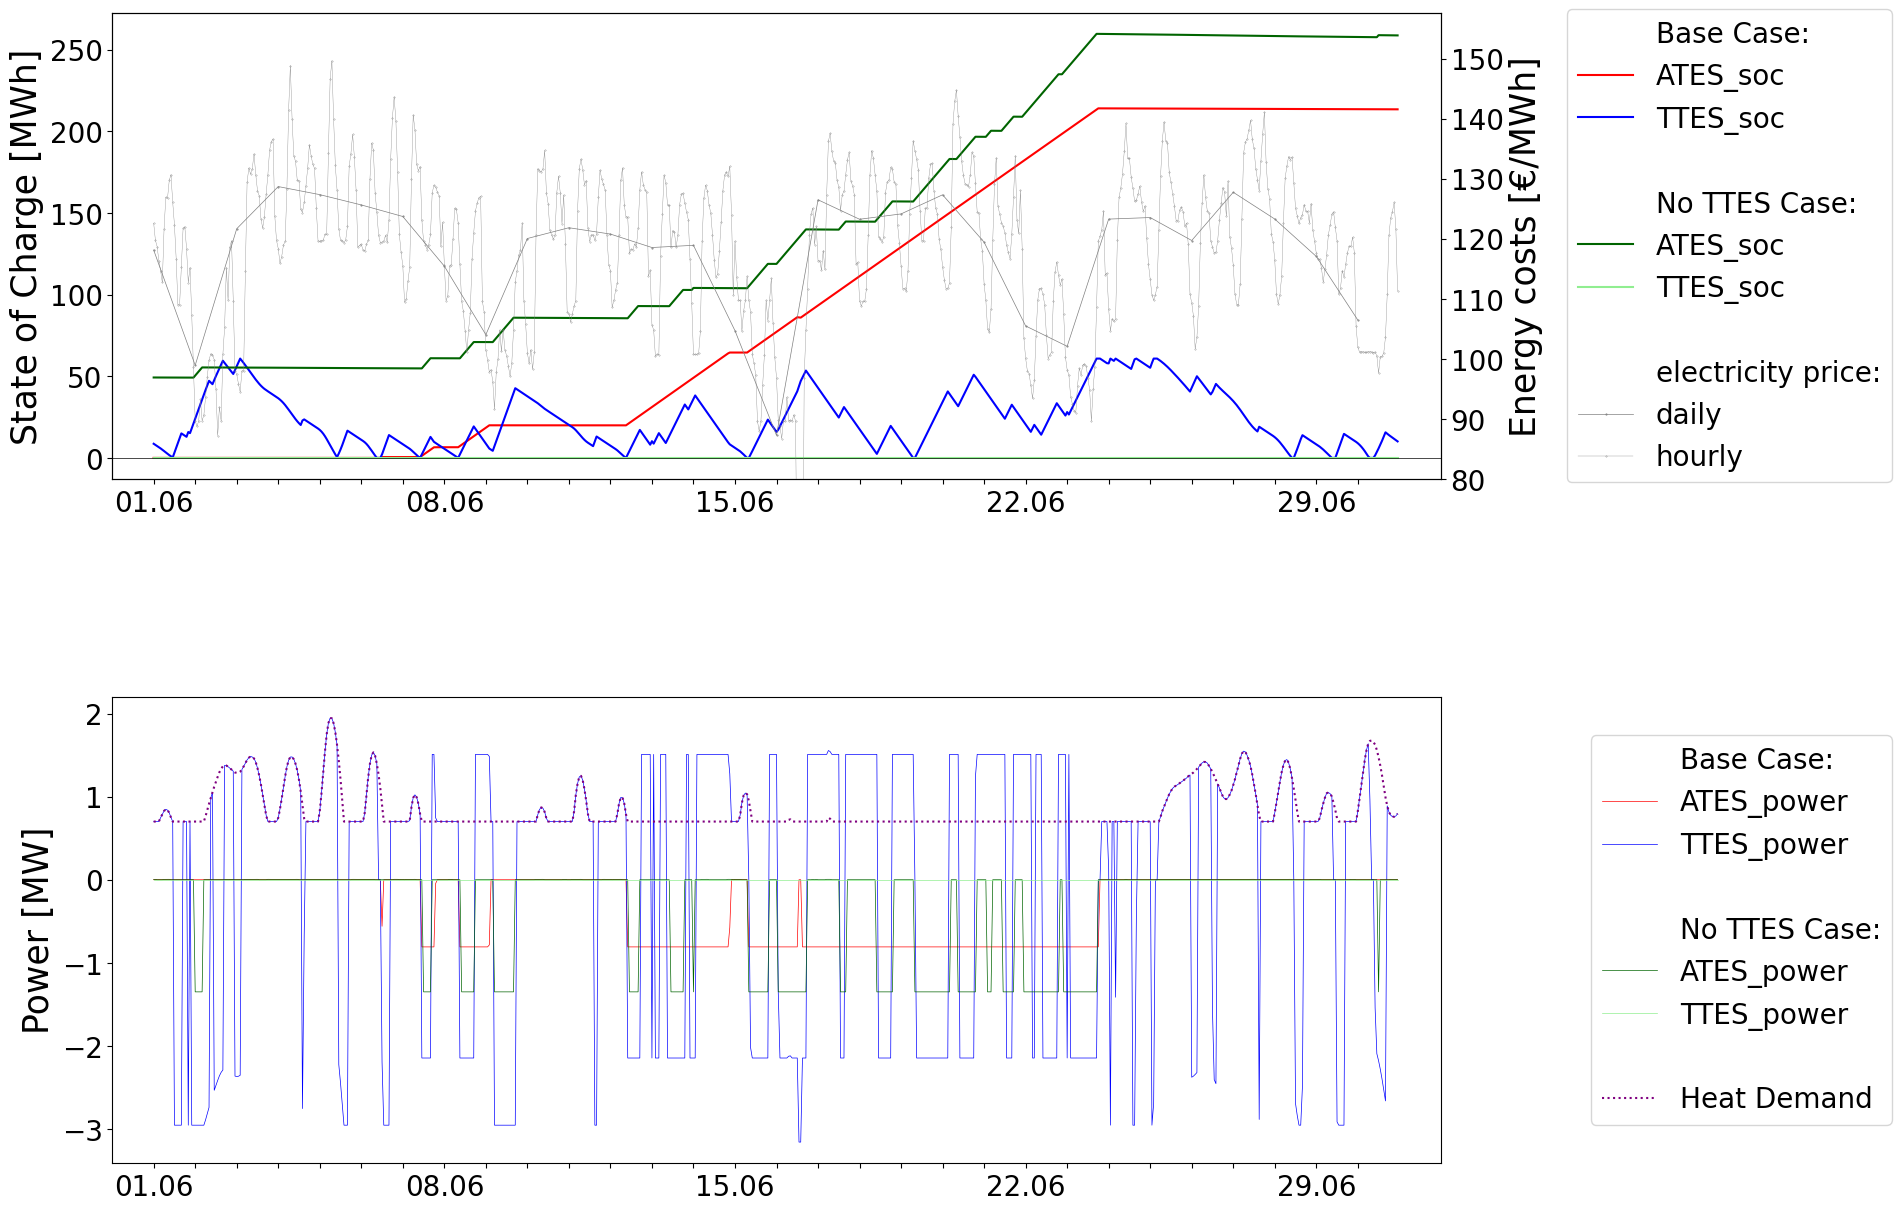

In [16]:
all_dfs_aux = all_dfs.iloc[[0, 3]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'white', 'darkgreen', 'lightgreen', 'white'])
case = np.array(['Base Case', 'No TTES Case'])

# Prepare figure with 2 rows
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(3*width[0], 3*width[1]), sharex=False, gridspec_kw={'hspace': 0.3}, constrained_layout=True)
ax2 = ax1.twinx()  # electricity price on top plot

handles_p1 = []
labels_p1 = []
handles_p2 = []
labels_p2 = []
color_idx = 0

for i, fname in enumerate(all_dfs_aux['name']):
    handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
    labels_p1.append(f'{case[i]}:')
    handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
    labels_p2.append(f'{case[i]}:')    

    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path)
    df.index = pd.to_datetime(df['datetime'])
    df = df.drop(columns=['datetime'], errors='ignore')  

    # Filter for June
    df_june = df[df.index.month == 6].copy()
    df_june['ATES_power'] = df_june['ATES_charge'] - df_june['ATES_discharge']

    color = rainbow_cmap[color_idx]
    h1, = ax1.plot(df_june['ATES_soc'], color=color, label=f'{case[i]} ATES_soc')
    g1, = ax3.plot(-df_june['ATES_power'], linewidth=0.5, color=color, label=f'{case[i]} ATES Power [MW]')

    color = rainbow_cmap[color_idx+1]
    h2, = ax1.plot(df_june['TTES_soc'], color=color, label=f'{case[i]} TTES_soc')
    g2, = ax3.plot(-df_june['TTES_charge'], linewidth=0.5, color=color, label=f'{case[i]} TTES Power [MW]')

    handles_p1.extend([h1, h2])
    handles_p2.extend([g1, g2])
    labels_p1.extend(['ATES_soc', 'TTES_soc'])
    labels_p2.extend(['ATES_power', 'TTES_power'])

    handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
    handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux):
        labels_p1.append('')
        labels_p2.append('')
    color_idx += 3

# --- Electricity price ---
ates_i_temp_df = pd.read_csv(os.path.join("csv_and_xlsx/Analysis_I_temp_time.csv"))
ates_i_temp_df.index = pd.to_datetime(ates_i_temp_df['time'])
ates_i_temp_df = ates_i_temp_df.drop(columns=['Unnamed: 0', 'time', 'datetime'], errors='ignore')
ates_i_temp_df_june = ates_i_temp_df[ates_i_temp_df.index.month == 6]

h5, = ax2.plot(ates_i_temp_df_june['electricity_price'].resample('D').mean(),
               color='grey', label='electricity_price daily', linewidth=0.5, marker='.', markersize=1)
h6, = ax2.plot(ates_i_temp_df_june['electricity_price'].resample('H').mean(),
               color='grey', label='electricity_price hourly', linewidth=0.25, marker='.', markersize=0.5)

handles_p1.append(matplotlib.lines.Line2D([], [], color='none'))
labels_p1.append('electricity price:')
handles_p1.extend([h5, h6])
labels_p1.extend(['daily', 'hourly'])

g5, = ax3.plot(ates_i_temp_df_june['heat_demand'],
         color='purple', label='Heat Demand [MW]', linestyle=':')

# handles_p2.append(matplotlib.lines.Line2D([], [], color='none'))
# labels_p2.append('')
handles_p2.extend([g5])
labels_p2.extend(['Heat Demand'])

# --- Axis labels ---
ax1.set_xlabel('')
ax1.set_ylabel('State of Charge [MWh]', fontsize=plotsize)
ax1.axhline(y=0, color='black', linewidth=0.5, linestyle='-')
ax2.set_ylabel('Energy costs [€/MWh]', fontsize=plotsize)
ax2.set_ylim(bottom=80)


ax3.set_ylabel('Power [MW]', fontsize=plotsize)

# --- Ticks and x-limits for top plot ---
tick_locs = df_june.resample('D').mean().index
tick_labels_june = df_june.index.strftime('%d.%m').unique()
ax1.set_xticks(tick_locs)
ax3.set_xticks(tick_locs)
# Show only every 3rd tick label (or change to 7 for every 7th)
step = 7  # set to 7 for every 7th
tick_labels_month_mod = [label if i % step == 0 else '' for i, label in enumerate(tick_labels_month)]
ax1.set_xticklabels(tick_labels_month_mod, fontsize=plotsize_min)
ax3.set_xticklabels(tick_labels_month_mod, fontsize=plotsize_min)
ax1.tick_params(axis='y', labelsize=plotsize_min)
ax2.tick_params(axis='y', labelsize=plotsize_min)
ax3.tick_params(axis='y', labelsize=plotsize_min)
ax1.set_xlim(tick_locs[0]-pd.Timedelta(days=1), tick_locs[-1] + pd.Timedelta(days=2))
ax3.set_xlim(tick_locs[0]-pd.Timedelta(days=1), tick_locs[-1] + pd.Timedelta(days=2))


ax1.legend(handles_p1, labels_p1, fontsize=plotsize_min, loc='center right', bbox_to_anchor=(1.35, 0.5))
ax3.legend(handles_p2, labels_p2, fontsize=plotsize_min, loc='center right', bbox_to_anchor=(1.35, 0.5))
#plt.tight_layout()

os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/basecase_noTTES_comparison_demand_June_with_power_temp.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


In [17]:
# Create series with conditional division (avoiding division by zero)
recovery_factor_ATES = []
recovery_factor_TTES = []
recovery_total_ATES = []
recovery_total_TTES = []

for idx, row in all_dfs.iterrows():
    if row['ATES_charge'] != 0:
        recovery_factor_ATES.append(row['ATES_discharge'] / row['ATES_charge'])
    else:
        recovery_factor_ATES.append(np.nan)
    if row['TTES_charge'] != 0:
        recovery_factor_TTES.append(row['TTES_discharge'] / row['TTES_charge'])
    else:
        recovery_factor_TTES.append(np.nan)
    if row['ATES_capacity'] != 0:
        recovery_total_ATES.append(row['ATES_charge'] / row['ATES_capacity'])
    else:
        recovery_total_ATES.append(np.nan)
    if row['TTES_capacity'] != 0:
        recovery_total_TTES.append(row['TTES_charge'] / row['TTES_capacity'])
    else:
        recovery_total_TTES.append(np.nan)
# Convert to numpy arrays for plotting
recovery_factor_ATES = np.array(recovery_factor_ATES)
recovery_factor_TTES = np.array(recovery_factor_TTES)
recovery_total_ATES = np.array(recovery_total_ATES)
recovery_total_TTES = np.array(recovery_total_TTES)


In [18]:
case_names = ['Base Case', 'No ATES Case', 'Set Power Case', 'No TTES Case']

def pct_change(val, base):
    if pd.isna(val) or pd.isna(base) or base == 0:
        return np.nan
    return (val - base) / base * 100

rows = []
metrics = [
    ('Recovery Factor ATES [%]', recovery_factor_ATES * 100),
    ('Recovery Factor TTES [%]', recovery_factor_TTES * 100),
    ('Load Cycles ATES [-]', recovery_total_ATES),
    ('Load Cycles TTES [-]', recovery_total_TTES),
    ('Capex ATES [\euro{}]', all_dfs['Capex_ATES_total']),
    ('Opex ATES [\euro{}]', all_dfs['Opex_ATES_total']),
    ('Capex TTES [\euro{}]', all_dfs['Capex_TTES_total']),
    ('Capacity ATES [MWh]', all_dfs['ATES_capacity']),
    ('Capacity TTES [MWh]', all_dfs['TTES_capacity']),
    ('Yearly System Costs [\euro{}]', all_dfs['objective_value']),
    ('Heat Costs [\euro{}]', all_dfs['costs_per_MWh_demand']),
]

for metric, values in metrics:
    base = values[0]
    no_ates = values[1]
    set_power = values[2]
    no_TTES = values[3]
    row = [
        metric,
        f"{base:.2f}",
        f"{no_ates:.2f}",
        f"({pct_change(no_ates, base):+,.1f}%)",
        f"{set_power:.2f}",
        f"({pct_change(set_power, base):+,.1f}%)",
        f"{no_TTES:.2f}",
        f"({pct_change(no_TTES, base):+,.1f}%)"
    ]
    rows.append(row)

table = pd.DataFrame(rows, columns=[
    'Metric', 'Base Case', 'No ATES Case', '($\Delta$%)', 'Set Power Case', '($\Delta$%)', 'No TTES Case', '($\Delta$%)'
])
from IPython.display import display
latex_table = table.to_latex(index=False, escape=False, column_format='lrrlrlrl')
latex_table = latex_table.replace('%', '\\%')

print(latex_table)
#display(table.style.hide(axis="index"))

\begin{tabular}{lrrlrlrl}
\toprule
Metric & Base Case & No ATES Case & ($\Delta$\%) & Set Power Case & ($\Delta$\%) & No TTES Case & ($\Delta$\%) \\
\midrule
Recovery Factor ATES [\%] & 78.85 & nan & (+nan\%) & 78.76 & (-0.1\%) & 70.97 & (-10.0\%) \\
Recovery Factor TTES [\%] & 99.71 & 99.53 & (-0.2\%) & 99.75 & (+0.0\%) & nan & (+nan\%) \\
Load Cycles ATES [-] & 1.01 & nan & (+nan\%) & 1.00 & (-0.5\%) & 1.14 & (+12.8\%) \\
Load Cycles TTES [-] & 87.91 & 59.23 & (-32.6\%) & 91.63 & (+4.2\%) & nan & (+nan\%) \\
Capex ATES [\euro{}] & 3172.12 & 0.00 & (-100.0\%) & 23574.22 & (+643.2\%) & 5295.83 & (+66.9\%) \\
Opex ATES [\euro{}] & 1507.42 & 0.00 & (-100.0\%) & 1819.03 & (+20.7\%) & 2071.48 & (+37.4\%) \\
Capex TTES [\euro{}] & 14972.40 & 27199.11 & (+81.7\%) & 13098.45 & (-12.5\%) & 0.00 & (-100.0\%) \\
Capacity ATES [MWh] & 769.58 & 0.00 & (-100.0\%) & 934.19 & (+21.4\%) & 980.45 & (+27.4\%) \\
Capacity TTES [MWh] & 60.85 & 110.54 & (+81.7\%) & 53.23 & (-12.5\%) & 0.00 & (-100.0\%) \\


In [19]:
from IPython.display import display

case_names = ['Base Case', 'Electricity Price Var Case', 'Electricity Price Var Case Bounded']

def pct_change(val, base):
    if pd.isna(val) or pd.isna(base) or base == 0:
        return np.nan
    return (val - base) / base * 100

rows = []
metrics = [
    ('Recovery Factor ATES [%]', [recovery_factor_ATES[0]*100, recovery_factor_ATES[4]*100, recovery_factor_ATES[5]*100]),
    ('Recovery Factor TTES [%]', [recovery_factor_TTES[0]*100, recovery_factor_TTES[4]*100, recovery_factor_TTES[5]*100]),
    ('Load Cycles ATES [-]', [recovery_total_ATES[0], recovery_total_ATES[4], recovery_total_ATES[5]]),
    ('Load Cycles TTES [-]', [recovery_total_TTES[0], recovery_total_TTES[4], recovery_total_TTES[5]]),
    ('Capex ATES [\\euro{}]', [all_dfs['Capex_ATES_total'][0], all_dfs['Capex_ATES_total'][4], all_dfs['Capex_ATES_total'][5]]),
    ('Opex ATES [\\euro{}]', [all_dfs['Opex_ATES_total'][0], all_dfs['Opex_ATES_total'][4], all_dfs['Opex_ATES_total'][5]]),
    ('Capex TTES [\\euro{}]', [all_dfs['Capex_TTES_total'][0], all_dfs['Capex_TTES_total'][4], all_dfs['Capex_TTES_total'][5]]),
    ('Capacity ATES [MWh]', [all_dfs['ATES_capacity'][0], all_dfs['ATES_capacity'][4], all_dfs['ATES_capacity'][5]]),
    ('Capacity TTES [MWh]', [all_dfs['TTES_capacity'][0], all_dfs['TTES_capacity'][4], all_dfs['TTES_capacity'][5]]),
    ('Yearly System Costs [\\euro{}]', [all_dfs['objective_value'][0], all_dfs['objective_value'][4], all_dfs['objective_value'][5]]),
    ('Heat Costs [\\euro{}]', [all_dfs['costs_per_MWh_demand'][0], all_dfs['costs_per_MWh_demand'][4], all_dfs['costs_per_MWh_demand'][5]]),
]

for metric, values in metrics:
    base = values[0]
    var_case = values[1]
    var_case_bounded = values[2]
    row = [
        metric,
        f"{base:.2f}",
        f"{var_case:.2f}",
        f"({pct_change(var_case, base):+,.1f}%)",
        f"{var_case_bounded:.2f}",
        f"({pct_change(var_case_bounded, base):+,.1f}%)"
    ]
    rows.append(row)

table = pd.DataFrame(rows, columns=[
    'Metric', 'Base Case', 'Electricity Price Var Case', '($\\Delta$%)',
    'Electricity Price Var Case Bounded', '($\\Delta$%)'
])
latex_table = table.to_latex(index=False, escape=False, column_format='lrrrrl')
latex_table = latex_table.replace('%', '\\%')

print(latex_table)
#display(table)

\begin{tabular}{lrrrrl}
\toprule
Metric & Base Case & Electricity Price Var Case & ($\Delta$\%) & Electricity Price Var Case Bounded & ($\Delta$\%) \\
\midrule
Recovery Factor ATES [\%] & 78.85 & 71.55 & (-9.3\%) & 53.15 & (-32.6\%) \\
Recovery Factor TTES [\%] & 99.71 & 99.21 & (-0.5\%) & 99.62 & (-0.1\%) \\
Load Cycles ATES [-] & 1.01 & 1.23 & (+21.9\%) & 1.24 & (+23.6\%) \\
Load Cycles TTES [-] & 87.91 & 34.43 & (-60.8\%) & 70.47 & (-19.8\%) \\
Capex ATES [\euro{}] & 3172.12 & 9973.23 & (+214.4\%) & 7612.95 & (+140.0\%) \\
Opex ATES [\euro{}] & 1507.42 & 3828.38 & (+154.0\%) & 805.29 & (-46.6\%) \\
Capex TTES [\euro{}] & 14972.40 & 62796.66 & (+319.4\%) & 20556.26 & (+37.3\%) \\
Capacity ATES [MWh] & 769.58 & 1670.88 & (+117.1\%) & 413.36 & (-46.3\%) \\
Capacity TTES [MWh] & 60.85 & 255.21 & (+319.4\%) & 83.54 & (+37.3\%) \\
Yearly System Costs [\euro{}] & 1045138.10 & 972381.39 & (-7.0\%) & 1058999.89 & (+1.3\%) \\
Heat Costs [\euro{}] & 54.62 & 50.81 & (-7.0\%) & 55.34 & (+1.3\%) 

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


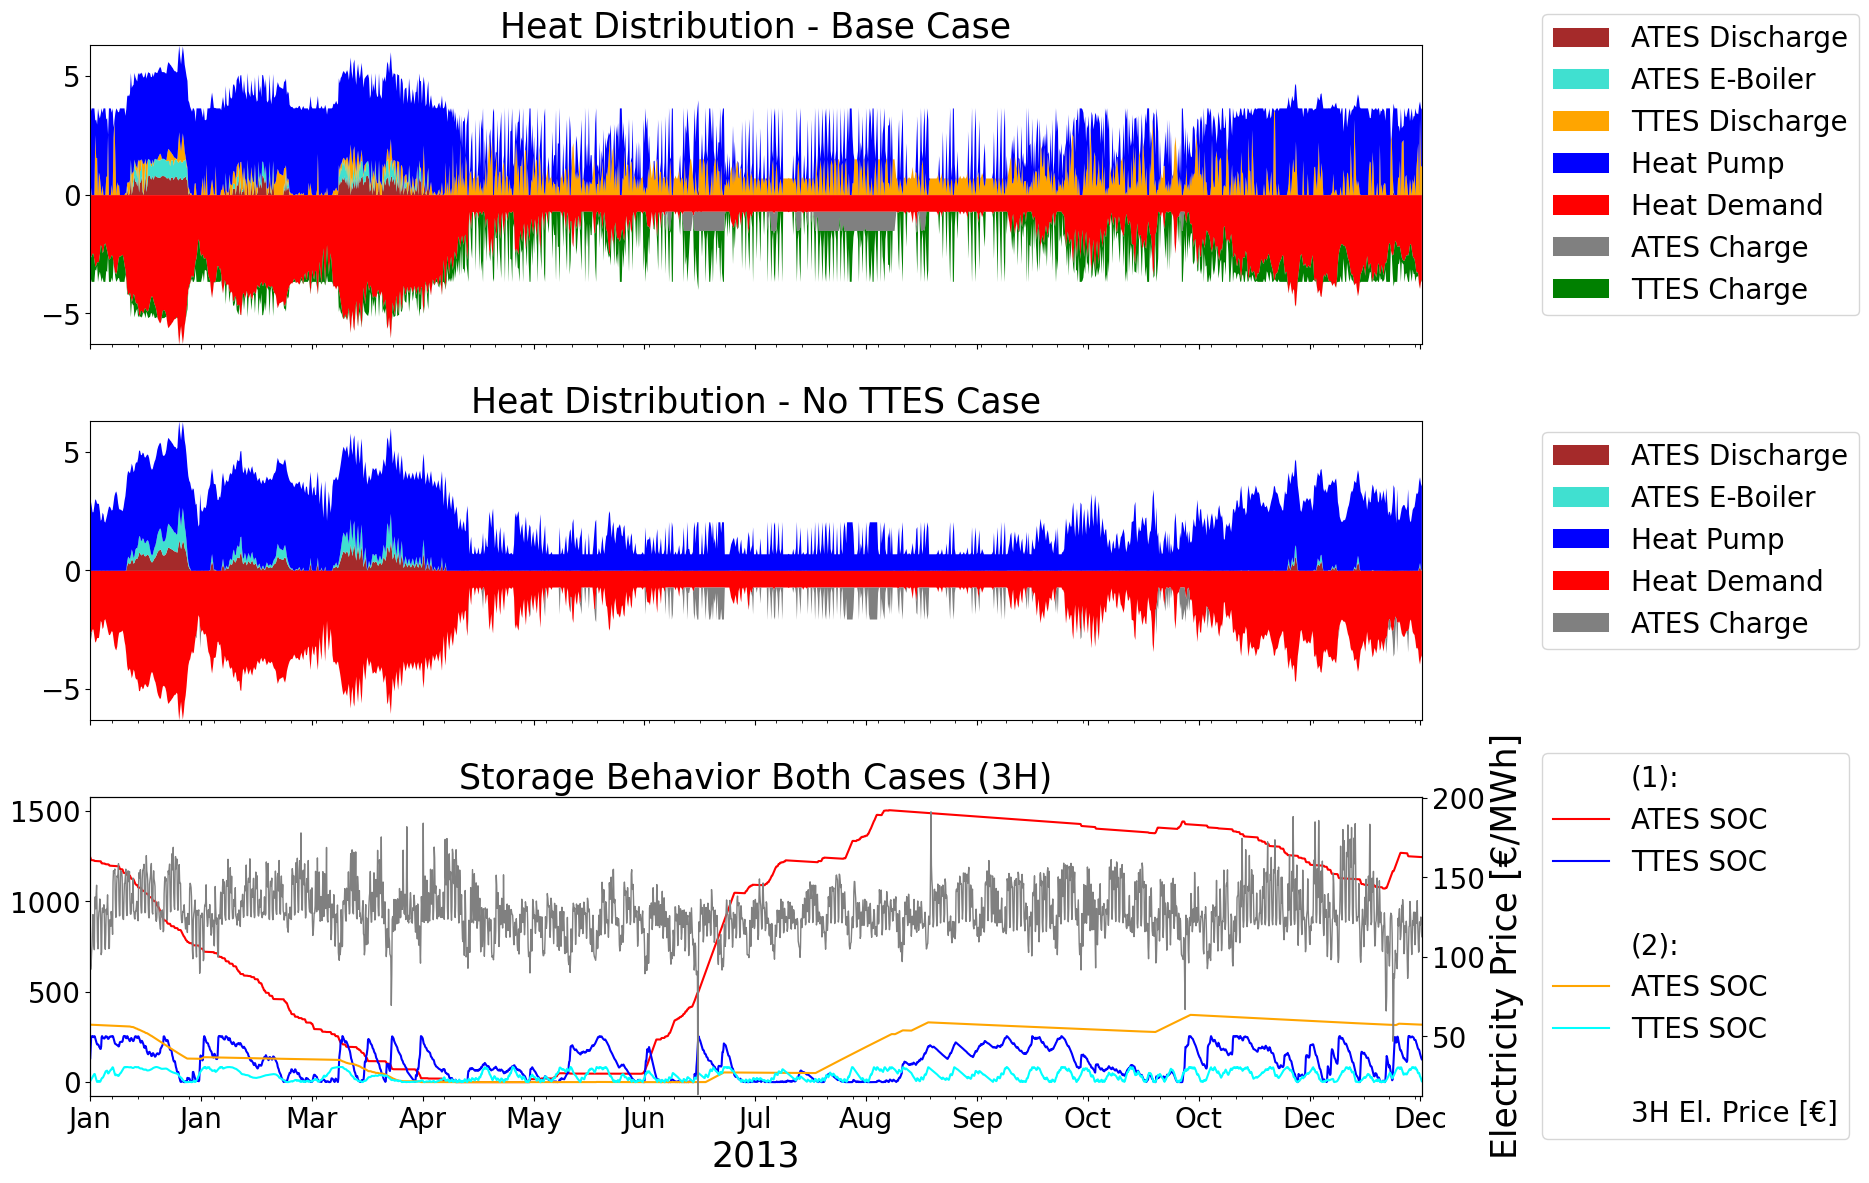

In [20]:
# Resample positive and negative dataframes for 3-hour mean
resample = '6H'
pos_df_1_resample = pos_df_1.resample(resample).mean()
neg_df_1_resample = neg_df_1.resample(resample).mean()
pos_df_2_resample = pos_df_2.resample(resample).mean()
neg_df_2_resample = neg_df_2.resample(resample).mean()

# Use resampled dataframes for 3-hour mean
y_min = min(neg_df_1_resample.sum(axis=1).min(), neg_df_2_resample.sum(axis=1).min())
y_max = max(pos_df_1_resample.sum(axis=1).max(), pos_df_2_resample.sum(axis=1).max())

fig, (ax_top, ax_bottom, ax_storage) = plt.subplots(3, 1, figsize=(3*width[0], 3*width[1]), sharex=True)

# Plot using the color mapping
pos_df_1_resample.plot.area(ax=ax_top, stacked=True, color=pos_colors_1, linewidth=0.005)
neg_df_1_resample.plot.area(ax=ax_top, stacked=True, color=neg_colors_1, linewidth=0.005)
ax_top.set_ylim(neg_df_1_resample.sum(axis=1).min(), pos_df_1_resample.sum(axis=1).max())
ax_top.tick_params(axis='y', labelsize=plotsize_min)
ax_top.set_title(f"Heat Distribution - {case[0]}", fontsize=plotsize)
ax_top.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

pos_df_2_resample.plot.area(ax=ax_bottom, stacked=True, color=pos_colors_2, linewidth=0.005)
neg_df_2_resample.plot.area(ax=ax_bottom, stacked=True, color=neg_colors_2, linewidth=0.005)
ax_bottom.set_ylim(neg_df_2_resample.sum(axis=1).min(),pos_df_2_resample.sum(axis=1).max())
ax_bottom.tick_params(axis='y', labelsize=plotsize_min)
ax_bottom.set_title(f"Heat Distribution - {case[1]}", fontsize=plotsize)
ax_bottom.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

# Third plot: Add 3-hour electricity price to storage_behav with its own y-axis
ax_price = ax_storage.twinx()

all_dfs_aux = all_dfs.iloc[[4, 5]]
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
handles = []
labels = []
case_short = ['(1)', '(2)']
color_idx = 0
for i, fname in enumerate(all_dfs_aux['name']):
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case_short[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    color = rainbow_cmap[color_idx]
    h1 = df['ATES_soc'].resample('3H').mean().plot(ax=ax_storage, color=color)
    handles.append(h1.lines[color_idx])
    labels.append('ATES SOC')
    color = rainbow_cmap[color_idx+1]
    h2 = df['TTES_soc'].resample('3H').mean().plot(ax=ax_storage, color=color)
    handles.append(h2.lines[color_idx+1])
    labels.append('TTES SOC')
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2

handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('')

h5 = threeH_electricity_price.plot(ax=ax_price, color='grey', label='3H Electricity Price', linewidth=1.0, linestyle='-')
handles.append(h5.lines[0])
labels.append('3H El. Price [€]')

ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right, 0.5))
plt.title("Storage Behavior Both Cases (3H)", fontsize=plotsize)

ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize)
ax_price.set_ylim(threeH_electricity_price.min() * 0.95, threeH_electricity_price.max() * 1.05)

ax_storage.tick_params(axis='y', labelsize=plotsize_min)
ax_price.tick_params(axis='y', labelsize=plotsize_min)

# Set x-ticks for 3H data
tick_locs_3h = threeH_electricity_price.index[list(range(0, len(threeH_electricity_price.index), len(threeH_electricity_price)//12))]
tick_labels_3h = tick_locs_3h.strftime('%b')
ax_storage.set_xticks(tick_locs_3h)
ax_storage.set_xticklabels(tick_labels_3h, fontsize=plotsize_min)
ax_storage.set_xlabel(pos_df_1_resample.index.year[0], fontsize=plotsize)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/Electricity_Price_Var_comparison_demand+soc_{resample}.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


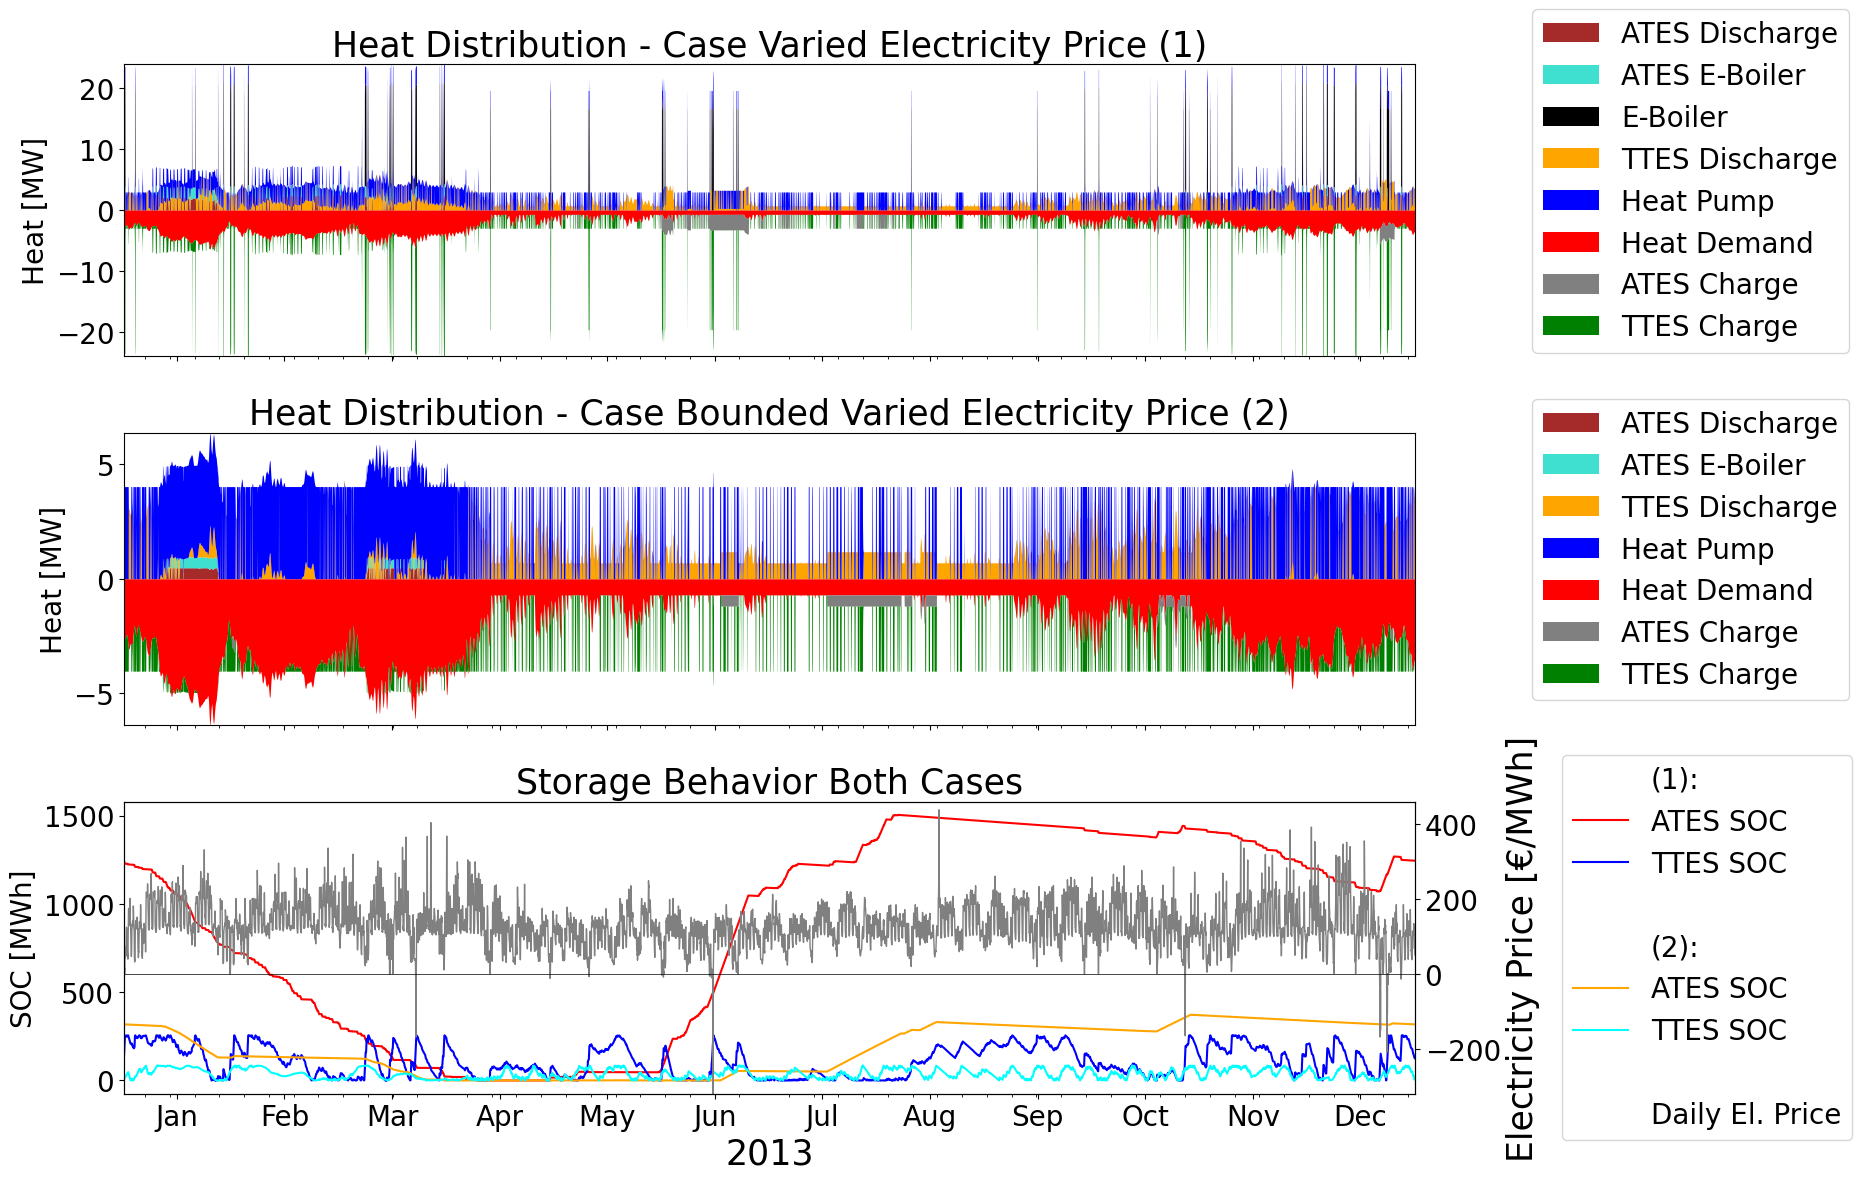

In [21]:
case = np.array(['Case Varied Electricity Price (1)', 'Case Bounded Varied Electricity Price (2)'])
pos_df_1, neg_df_1 = get_energy_distribution_data(df_05, df_05.index, df_05['heat_demand'])
pos_df_2, neg_df_2 = get_energy_distribution_data(df_06, df_06.index, df_06['heat_demand'])
y_min = neg_df_2.sum(axis=1).min()
y_max = pos_df_2.sum(axis=1).max()

fig, (ax_top, ax_bottom, ax_storage) = plt.subplots(3, 1, figsize=(3*width[0], 3*width[1]), sharex=True)

# Define color mapping for each technology
tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "brown",
    "TTES Charge": "green",
    "TTES Discharge": "orange",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_1 = [tech_colors.get(col, "grey") for col in pos_df_1.columns]
neg_colors_1 = [tech_colors.get(col, "grey") for col in neg_df_1.columns]
pos_colors_2 = [tech_colors.get(col, "grey") for col in pos_df_2.columns]
neg_colors_2 = [tech_colors.get(col, "grey") for col in neg_df_2.columns]

# Plot using the color mapping
pos_df_1.plot.area(ax=ax_top, stacked=True, color=pos_colors_1, linewidth=0.005)
neg_df_1.plot.area(ax=ax_top, stacked=True, color=neg_colors_1, linewidth=0.005)
ax_top.set_ylim(neg_df_1.sum(axis=1).min(), pos_df_1.sum(axis=1).max())
ax_top.tick_params(axis='y', labelsize=plotsize_min)
ax_top.set_title(f"Heat Distribution - {case[0]}", fontsize=plotsize)
ax_top.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)
ax_top.set_ylabel("Heat [MW]", fontsize=plotsize_min)

pos_df_2.plot.area(ax=ax_bottom, stacked=True, color=pos_colors_2, linewidth=0.005)
neg_df_2.plot.area(ax=ax_bottom, stacked=True, color=neg_colors_2, linewidth=0.005)
ax_bottom.set_ylim(neg_df_2.sum(axis=1).min(), pos_df_2.sum(axis=1).max())
ax_bottom.tick_params(axis='y', labelsize=plotsize_min)
ax_bottom.set_ylabel("Heat [MW]", fontsize=plotsize_min)
ax_bottom.set_title(f"Heat Distribution - {case[1]}", fontsize=plotsize)
ax_bottom.legend(loc='center left', bbox_to_anchor=(bbox_right, 0.6), fontsize=plotsize_min)

# Third plot: Add daily_el_price to storage_behav with its own y-axis
ax_price = ax_storage.twinx()

all_dfs_aux = all_dfs.iloc[[4, 5]]
num_group_files = len(all_dfs_aux)
rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
handles = []
labels = []

color_idx = 0
case_short = ['(1)', '(2)']
for i, fname in enumerate(all_dfs_aux['name']):
    # Add headline for each case (plain label, no line)
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    labels.append(f'{case_short[i]}:')
    df_path = os.path.join(folder, fname)
    df = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    color = rainbow_cmap[color_idx]
    h1 = df['ATES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h1.lines[color_idx])
    labels.append('ATES SOC')
    color = rainbow_cmap[color_idx+1]
    h2 = df['TTES_soc'].plot(ax=ax_storage, color=color)
    handles.append(h2.lines[color_idx+1])
    labels.append('TTES SOC')
    handles.append(matplotlib.lines.Line2D([], [], color='none'))
    if i < len(all_dfs_aux)-1:
        labels.append('')
    color_idx += 2

handles.append(matplotlib.lines.Line2D([], [], color='none'))
labels.append('')

h5 = daily_el_price_raw.plot(ax=ax_price, color='grey', label='Daily Electricity Price', linewidth=1.0, linestyle='-')
handles.append(h5.lines[0])
labels.append('Daily El. Price')

ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right+0.023, 0.5))
ax_storage.set_ylabel("SOC [MWh]", fontsize=plotsize_min)
plt.title("Storage Behavior Both Cases", fontsize=plotsize)

ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize)
ax_price.set_ylim(daily_el_price_raw.min() * 0.95, daily_el_price_raw.max() * 1.05)
ax_price.axhline(0, color='black', linewidth=0.5)

ax_storage.tick_params(axis='y', labelsize=plotsize_min)
ax_price.tick_params(axis='y', labelsize=plotsize_min)

tick_locs = pos_df_01.index[list(range(15*24, len(pos_df_01.index), 8760 // 12))]
tick_labels = tick_locs.strftime('%b')
#plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=20)
#plt.xlabel(pos_df_01.index.year[0], fontsize=20)
ax_storage.set_xticks(tick_locs)
ax_storage.set_xticklabels(tick_labels, fontsize=plotsize_min)
ax_storage.set_xlabel(pos_df_01.index.year[0], fontsize=plotsize)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/Electricity_Price_Var_comparison_demand+soc.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-

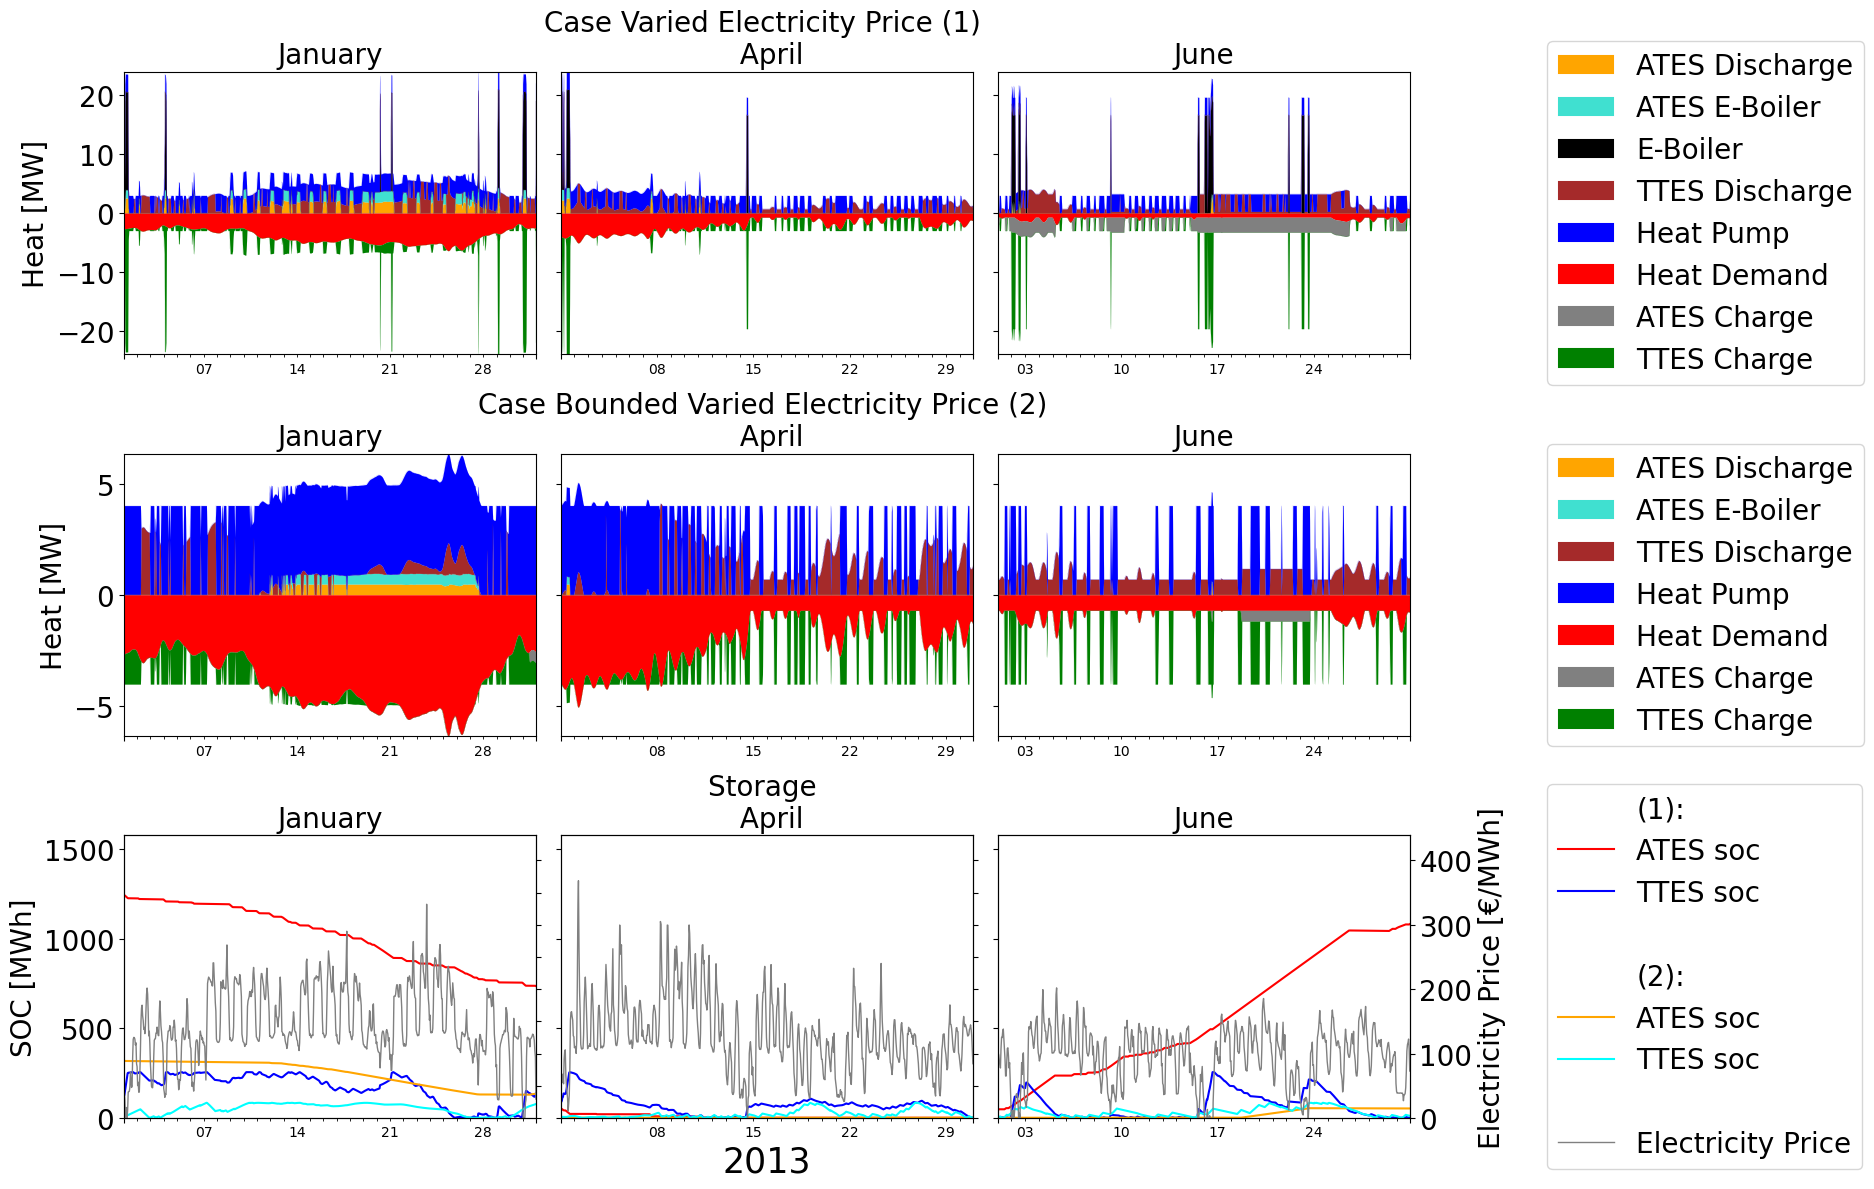

In [22]:
# Resample all dataframes to 3-hour values (sum or mean as appropriate)
resample = 'H'

pos_df_01, neg_df_01 = get_energy_distribution_data(df_05, df_05.index, df_05['heat_demand'])
pos_df_02, neg_df_02 = get_energy_distribution_data(df_06, df_06.index, df_06['heat_demand'])

pos_df_1_resample = pos_df_01.resample(resample).mean()
neg_df_1_resample = neg_df_01.resample(resample).mean()
pos_df_2_resample = pos_df_02.resample(resample).mean()
neg_df_2_resample = neg_df_02.resample(resample).mean()

num_dfs = 0
for i, fname in enumerate(all_dfs['name'].iloc[[4, 5]]):
    df_path = os.path.join(folder, fname)
    globals()[f'df_{i}'] = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    num_dfs+=1

soc_min, soc_max = -1, 0
for i in range(num_dfs):
    if max(globals()[f'df_{i}']['TTES_soc'].max(), globals()[f'df_{i}']['ATES_soc'].max()) * 1.05 > soc_max:
        soc_max = max(globals()[f'df_{i}']['TTES_soc'].max(), globals()[f'df_{i}']['ATES_soc'].max()) * 1.05

tick_fontsize = 10

tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "orange",
    "TTES Charge": "green",
    "TTES Discharge": "brown",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_01 = [tech_colors.get(col, "grey") for col in pos_df_01.columns]
neg_colors_01 = [tech_colors.get(col, "grey") for col in neg_df_01.columns]
pos_colors_02 = [tech_colors.get(col, "grey") for col in pos_df_02.columns]
neg_colors_02 = [tech_colors.get(col, "grey") for col in neg_df_02.columns]

months = [1, 4, 6]
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
Cases = ['Case Varied Electricity Price (1)', 'Case Bounded Varied Electricity Price (2)']
case_num = ['(1)', '(2)']

fig, axes = plt.subplots(3, 3, figsize=(3*width[0], 3*width[1]), sharex=False)

for j, month in enumerate(months):
    # Masks for the month
    mask_01 = pos_df_01.index.month == month
    mask_02 = pos_df_02.index.month == month
    mask_neg_01 = neg_df_01.index.month == month
    mask_neg_02 = neg_df_02.index.month == month

    # Row 0: Base Case
    ax = axes[0, j]
    pos_df_01[mask_01].plot.area(ax=ax, stacked=True, color=pos_colors_01, linewidth=0.05, legend=False)
    neg_df_01[mask_neg_01].plot.area(ax=ax, stacked=True, color=neg_colors_01, linewidth=0.05, legend=False)
    ax.set_ylim(neg_df_01.sum(axis=1).min(), pos_df_01.sum(axis=1).max())
    if j == 1:
        ax.set_title(f"{Cases[0]} \n {month_names[month]}", fontsize=plotsize_min)
    else:
        ax.set_title(f"{month_names[month]}", fontsize=plotsize_min)
    ax.tick_params(axis='y', labelsize=plotsize_min)
    ax.tick_params(axis='x', labelsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 0 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only rightmost plot gets legend
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 1: No ATES
    ax = axes[1, j]
    pos_df_02[mask_02].plot.area(ax=ax, stacked=True, color=pos_colors_02, linewidth=0.05, legend=False)
    neg_df_02[mask_neg_02].plot.area(ax=ax, stacked=True, color=neg_colors_02, linewidth=0.05, legend=False)
    ax.set_ylim(neg_df_02.sum(axis=1).min(), pos_df_02.sum(axis=1).max())
    if j == 1:
        ax.set_title(f"{Cases[1]} \n {month_names[month]}", fontsize=plotsize_min)
    else:
        ax.set_title(f"{month_names[month]}", fontsize=plotsize_min)
    ax.tick_params(axis='y', labelsize=plotsize_min)
    ax.tick_params(axis='x', labelsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 1 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 2: Storage behavior and electricity price
    ax_storage = axes[2, j]
    ax_price = ax_storage.twinx()
    handles, labels = ax_storage.get_legend_handles_labels()
    color_idx = 0
    rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
    for i in range(num_dfs):
        df = globals()[f'df_{i}']
        df_month = df[df.index.month == month]

        handles.append(matplotlib.lines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0))
        labels.append(f'{case_num[i]}:')
        color = rainbow_cmap[color_idx]
        x = df_month['ATES_soc'].plot(ax=ax_storage, color=color)
        handles.append(x.lines[color_idx])
        labels.append(f'ATES soc')
        color = rainbow_cmap[color_idx+1]
        x = df_month['TTES_soc'].plot(ax=ax_storage, color=color, label=f'TTES soc')
        handles.append(x.lines[color_idx+1])
        labels.append(f'TTES soc')
        color_idx += 2
        handles.append(matplotlib.lines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0))
        labels.append('')

    # Add electricity price to all bottom plots
    price_month = df_price[df_price.index.month == month]['electricity_price_raw'].resample(resample).mean()
    price_month.plot(ax=ax_price, color='grey', linewidth=1.0, linestyle='-', label='Electricity Price')
    
    price_lines, price_labels = ax_price.get_legend_handles_labels()
    handles.append(price_lines[0])
    labels.append('Electricity Price')

    ax_price.set_ylim(0, df_price['electricity_price_raw'].max())

    ax_storage.set_title(f"Storage - {month_names[month]}", fontsize=plotsize_min)
    ax_storage.set_ylim(soc_min, soc_max)
    ax_storage.tick_params(axis='y', labelsize=plotsize_min)

    if j == 0:
        ax_storage.set_ylabel("SOC [MWh]", fontsize=plotsize_min)
        ax_storage.set_title(f"{month_names[month]}", fontsize=plotsize_min)

        #ax_storage.set_yticklabels([])
        ax_price.set_ylabel('')
        ax_price.set_yticklabels([])
    elif j == 2:
        ax_storage.set_ylabel("")
        ax_storage.set_title(f"{month_names[month]}", fontsize=plotsize_min)

        ax_storage.set_yticklabels([])
        ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize_min)
        ax_price.tick_params(axis='y', labelsize=plotsize_min)

        ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))
    else:
        ax_storage.set_ylabel("")
        ax_storage.set_title(f"Storage \n {month_names[month]}", fontsize=plotsize_min)

        ax_storage.set_yticklabels([])
        ax_price.set_ylabel('')
        ax_price.set_yticklabels([])
    
    axes[2, j].set_xlabel("")
    ax_storage.set_xticklabels([])# Only bottom row gets x labels
    if j == 1:
        ax_storage.set_xlabel(df_01.index.year[0], fontsize=plotsize)
    ax_price.tick_params(axis='x', labelsize=plotsize_min)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/Electricity_Price_Var_comparison_demand+soc_Months.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-

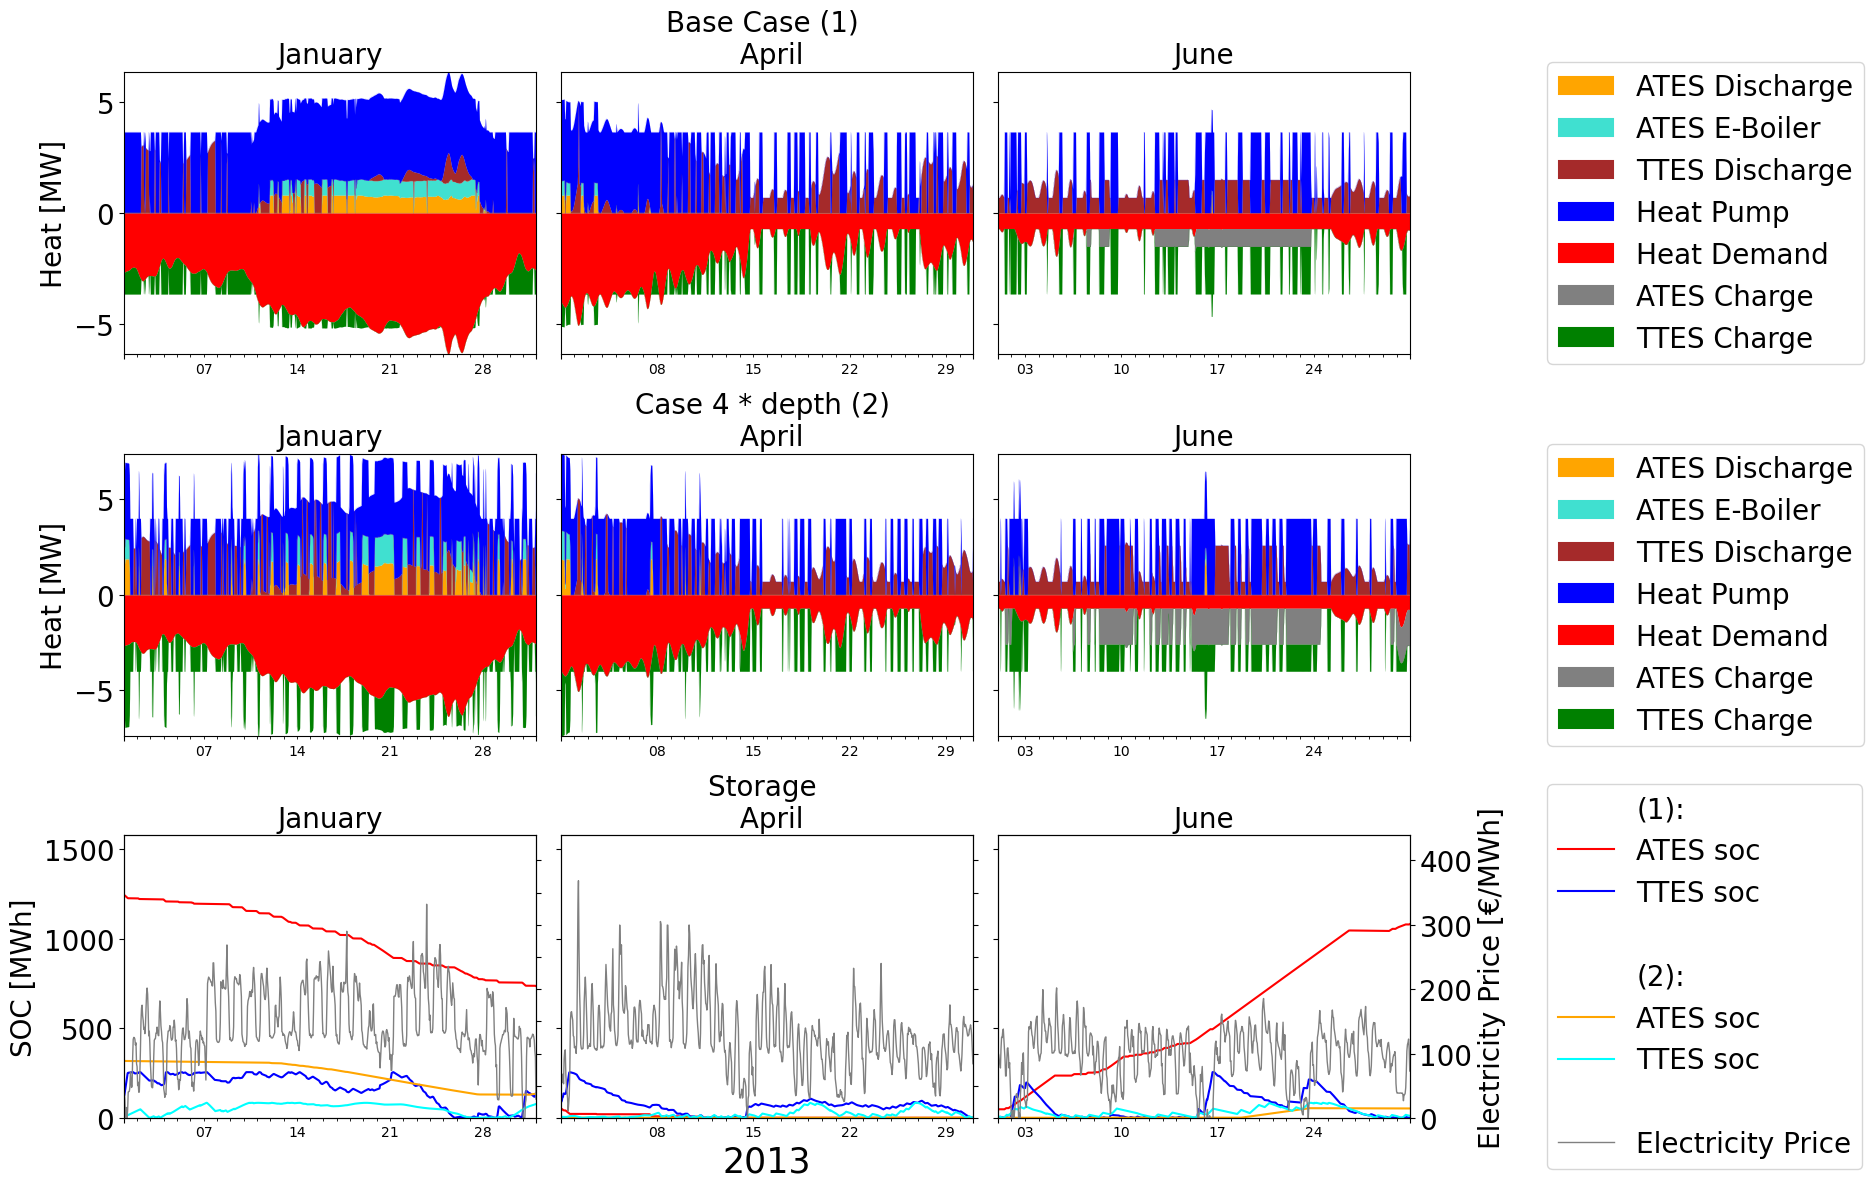

In [23]:
# Resample all dataframes to 3-hour values (sum or mean as appropriate)
resample = 'H'

pos_df_01, neg_df_01 = get_energy_distribution_data(df_01, df_01.index, df_01['heat_demand'])
pos_df_02, neg_df_02 = get_energy_distribution_data(df_07, df_07.index, df_07['heat_demand'])

pos_df_1_resample = pos_df_01.resample(resample).mean()
neg_df_1_resample = neg_df_01.resample(resample).mean()
pos_df_2_resample = pos_df_02.resample(resample).mean()
neg_df_2_resample = neg_df_02.resample(resample).mean()

num_dfs = 0
for i, fname in enumerate(all_dfs['name'].iloc[[4, 5]]):
    df_path = os.path.join(folder, fname)
    globals()[f'df_{i}'] = pd.read_csv(df_path, parse_dates=['datetime'], index_col='datetime')
    num_dfs+=1

soc_min, soc_max = -1, 0
for i in range(num_dfs):
    if max(globals()[f'df_{i}']['TTES_soc'].max(), globals()[f'df_{i}']['ATES_soc'].max()) * 1.05 > soc_max:
        soc_max = max(globals()[f'df_{i}']['TTES_soc'].max(), globals()[f'df_{i}']['ATES_soc'].max()) * 1.05

tick_fontsize = 10

tech_colors = {
    "ATES Charge": "grey",
    "ATES Discharge": "orange",
    "TTES Charge": "green",
    "TTES Discharge": "brown",
    "Heat Demand": "red",
    "Heat Pump": "blue",
    "E-Boiler": "black",
    "ATES HP": "violet",
    "ATES E-Boiler": "turquoise",
}

# Get colors for columns present in the dataframe
pos_colors_01 = [tech_colors.get(col, "grey") for col in pos_df_01.columns]
neg_colors_01 = [tech_colors.get(col, "grey") for col in neg_df_01.columns]
pos_colors_02 = [tech_colors.get(col, "grey") for col in pos_df_02.columns]
neg_colors_02 = [tech_colors.get(col, "grey") for col in neg_df_02.columns]

months = [1, 4, 6]
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
Cases = ['Base Case (1)', 'Case 4 * depth (2)']
case_num = ['(1)', '(2)']

fig, axes = plt.subplots(3, 3, figsize=(3*width[0], 3*width[1]), sharex=False)

for j, month in enumerate(months):
    # Masks for the month
    mask_01 = pos_df_01.index.month == month
    mask_02 = pos_df_02.index.month == month
    mask_neg_01 = neg_df_01.index.month == month
    mask_neg_02 = neg_df_02.index.month == month

    # Row 0: Base Case
    ax = axes[0, j]
    pos_df_01[mask_01].plot.area(ax=ax, stacked=True, color=pos_colors_01, linewidth=0.05, legend=False)
    neg_df_01[mask_neg_01].plot.area(ax=ax, stacked=True, color=neg_colors_01, linewidth=0.05, legend=False)
    ax.set_ylim(neg_df_01.sum(axis=1).min(), pos_df_01.sum(axis=1).max())
    if j == 1:
        ax.set_title(f"{Cases[0]} \n {month_names[month]}", fontsize=plotsize_min)
    else:
        ax.set_title(f"{month_names[month]}", fontsize=plotsize_min)
    ax.tick_params(axis='y', labelsize=plotsize_min)
    ax.tick_params(axis='x', labelsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 0 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only rightmost plot gets legend
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 1: No ATES
    ax = axes[1, j]
    pos_df_02[mask_02].plot.area(ax=ax, stacked=True, color=pos_colors_02, linewidth=0.05, legend=False)
    neg_df_02[mask_neg_02].plot.area(ax=ax, stacked=True, color=neg_colors_02, linewidth=0.05, legend=False)
    ax.set_ylim(neg_df_02.sum(axis=1).min(), pos_df_02.sum(axis=1).max())
    if j == 1:
        ax.set_title(f"{Cases[1]} \n {month_names[month]}", fontsize=plotsize_min)
    else:
        ax.set_title(f"{month_names[month]}", fontsize=plotsize_min)
    ax.tick_params(axis='y', labelsize=plotsize_min)
    ax.tick_params(axis='x', labelsize=plotsize_min)
    if j == 0:
        ax.set_ylabel("Heat [MW]", fontsize=plotsize_min)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    if 1 != 2:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    if j == 2:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))

    # Row 2: Storage behavior and electricity price
    ax_storage = axes[2, j]
    ax_price = ax_storage.twinx()
    handles, labels = ax_storage.get_legend_handles_labels()
    color_idx = 0
    rainbow_cmap = np.array(['red', 'blue', 'orange', 'cyan'])
    for i in range(num_dfs):
        df = globals()[f'df_{i}']
        df_month = df[df.index.month == month]

        handles.append(matplotlib.lines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0))
        labels.append(f'{case_num[i]}:')
        color = rainbow_cmap[color_idx]
        x = df_month['ATES_soc'].plot(ax=ax_storage, color=color)
        handles.append(x.lines[color_idx])
        labels.append(f'ATES soc')
        color = rainbow_cmap[color_idx+1]
        x = df_month['TTES_soc'].plot(ax=ax_storage, color=color, label=f'TTES soc')
        handles.append(x.lines[color_idx+1])
        labels.append(f'TTES soc')
        color_idx += 2
        handles.append(matplotlib.lines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0))
        labels.append('')

    # Add electricity price to all bottom plots
    price_month = df_price[df_price.index.month == month]['electricity_price_raw'].resample(resample).mean()
    price_month.plot(ax=ax_price, color='grey', linewidth=1.0, linestyle='-', label='Electricity Price')
    
    price_lines, price_labels = ax_price.get_legend_handles_labels()
    handles.append(price_lines[0])
    labels.append('Electricity Price')

    ax_price.set_ylim(0, df_price['electricity_price_raw'].max())

    ax_storage.set_title(f"Storage - {month_names[month]}", fontsize=plotsize_min)
    ax_storage.set_ylim(soc_min, soc_max)
    ax_storage.tick_params(axis='y', labelsize=plotsize_min)

    if j == 0:
        ax_storage.set_ylabel("SOC [MWh]", fontsize=plotsize_min)
        ax_storage.set_title(f"{month_names[month]}", fontsize=plotsize_min)

        #ax_storage.set_yticklabels([])
        ax_price.set_ylabel('')
        ax_price.set_yticklabels([])
    elif j == 2:
        ax_storage.set_ylabel("")
        ax_storage.set_title(f"{month_names[month]}", fontsize=plotsize_min)

        ax_storage.set_yticklabels([])
        ax_price.set_ylabel('Electricity Price [€/MWh]', fontsize=plotsize_min)
        ax_price.tick_params(axis='y', labelsize=plotsize_min)

        ax_storage.legend(handles, labels, fontsize=plotsize_min, loc='center left', bbox_to_anchor=(bbox_right_months, 0.5))
    else:
        ax_storage.set_ylabel("")
        ax_storage.set_title(f"Storage \n {month_names[month]}", fontsize=plotsize_min)

        ax_storage.set_yticklabels([])
        ax_price.set_ylabel('')
        ax_price.set_yticklabels([])
    
    axes[2, j].set_xlabel("")
    ax_storage.set_xticklabels([])# Only bottom row gets x labels
    if j == 1:
        ax_storage.set_xlabel(df_01.index.year[0], fontsize=plotsize)
    ax_price.tick_params(axis='x', labelsize=plotsize_min)

plt.tight_layout()
os.makedirs("RESULTS_PDFs", exist_ok=True)
pdf_path = os.path.join(f"RESULTS_PDFs/Electricity_Price_Var_comparison_demand+soc_Months.pdf")
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.show()
